#Exploration of COVID19 Vaccination Data on the basis of Presidential Election Results Group ID: 4

**Group Members:**

*   Arda Gündüz
*   Ege Bağırsakçı
*   Erdem Karataş
*   Eylül Öykü Şen
*   Kaan Karabacakoğlu
*   Özgür Yılmaz Beker

##Introduction
The project aims to investigate the relation between vaccination rate and political preference
based on U.S. with three discrete datasets. If a significant difference could be observed for this sample, machine learning models, such as a classifier model for countries/states/counties,  could be created to infer the ruling ideology in a given area. The labels will be predicted by this model according to the vaccination rate (defined below) of the given area. This label may be used to raise awareness about the shortcomings of the ruling party in preventing the spread of the pandemic. These parties may then be called to encourage the people about vaccination.       

###Problem Definition
To investigate the problem, the following approach will be employed:



1.   The **US President 1976-2020** dataset will be explored to determine the state labels as either **DEMOCRAT** or **REPUBLICAN**. This process will be done by examining the last three elections (2012-2016-2020) and comparing win counts for the two groups.


2.   The **COVID-19 Vaccinations in the United States, County** dataset will be explored to determine a **Vaccination Rate** for different states. This variable will be obtained by plotting the cumulative vaccination counts along days and using **linear regression** on said data points to determine a line fit. **The slope of this line** will be assigned as the **Vaccination Rate for that state**.


3.  A **two sample t-test** will be conducted between the DEMOCRAT and REPUBLICAN samples to determine **whether $\large{\mu_1}$ $\geq$ $\large{\mu_2}$ holds** with respect to $\large{\alpha_1}$ = 0.05 and $\large{\alpha_2}$ = 0.075.


4. If the results are significant enough, then we will proceed with developing different classifier models (**which includes more features from the USA State Demographics Dataset**) to make use of our results from the previous part.



###Utilized Datasets

Three different datasets were used in the project:


1.  **COVID-19 Vaccinations in the United States, County**


* *Vaccination dataset contains information about COVID-19 Vaccine administration and  vaccine equity in a county level.*

2.  **U.S. President 1976–2020**

* *U.S. President 1976-2020 dataset contains state-level results for elections of the U.S. presidency from 1976 to 2020*

3. **USA State Demographics**
* *Contains demographics data used for features*



The links for datasets which was stated above:


*   https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh
*   https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX
*  https://corgis-edu.github.io/corgis/csv/state_demographics/









###Dataset Cleaning / Preprocessing
This section includes the workflow used for cleaning / preprocessing **US Covid Vaccination** and  **MIT US Presidential Election Results** datasets. The **US State Demographics** dataset has already been cleaned by the providers.

In [ ]:
#including the necessary libraries.
import pandas as pd
import numpy as np
from os.path import join

In [ ]:
#mounting the drive in order to access the dataset.
from google.colab import drive 
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive/CS210 Proje/"

Mounted at ./drive


####Workflow 1: US Covid Vaccination Results preprocessing

The flow is as follows:



1.   Read the dataset into a **DataFrame**.
2.   Subset DataFrame with respect to the columns:

  *   **Recip_State**
  *   **Recip_County**
  *   **Series_Complete_Yes**
  *   **Date**



3.   Drop **rows with all columns NA values** if any exist. 


4. **Sort** the dataset in **ascending** fashion with respect to factors:
  *   **Date**
  *   **Recip_State**
  *   **Recip_County**
  
  in the given order of importance.


5. **Export** results to csv.




In [ ]:
filename = "COVID-19_Vaccinations_in_the_United_States_County.csv"
dataframe = pd.read_csv(join(path_prefix, filename)) #File is extracted with pandas.

In [ ]:
#Excluding the colums that will not be used. The necessary columns are  “Recip_State”, “Recip_County”, “Series_Complete_Yes”,and “Date”.
dataframe = dataframe[["Recip_State" , "Recip_County", "Series_Complete_Yes", "Date"]]

#Checking whether the dataset has any NaN values.
column_Name_List = ["Recip_State" , "Recip_County", "Series_Complete_Yes", "Date"]
for column in column_Name_List:
  if not dataframe[column].isnull().values.any():
    print("Column", column,"has no NaN values.")
  else:
    print("Column", column, "has NaN values.")

#Since there are no columns which contain NaN values, skipping column/row removal.


#Dataframe will be sorted with respect to "Date" , "Recip_State", "Recip_County".
#First, convert Date column to dateTime object
dataframe["Date"] = pd.to_datetime(dataframe.Date)
dataframe.sort_values(by=["Recip_State", "Recip_County", "Date"], ascending=True, inplace=True)


#Lastly, csv file will be written.
#dataframe.to_csv(join(path_prefix, filename[:filename.find(".")] + "_cleaned.csv")) //UNCOMMENT THIS LINE TO REPRODUCE CSV 



Column Recip_State has no NaN values.
Column Recip_County has no NaN values.
Column Series_Complete_Yes has no NaN values.
Column Date has no NaN values.


####Workflow 2: MIT US Presidential Election Results preprocessing
The flow is as follows:


1.   Read the dataset into a **DataFrame**


2.   Subset DataFrame with respect to columns:
  * **year**
  * **state**
  * **state_po**
  * **candidatevotes**
  * **totalvotes**
  * **party_simplified**


3. Filter rows so that only rows with the following attributes remain:
  * **year** is one of {2012, 2016, 2020}
  * **party_simplified** is one of {DEMOCRAT, REPUBLICAN}


4. Drop **rows with all columns NA values** if any exist.


5. **Sort** the dataset in **ascending** fashion with respect to factors:
  * **year**
  * **state**
  * **party_simplified**

  in the given order of importance.


6. **Export** results to csv.


In [ ]:
#reading the dataset into a dataframe
filename1 = '1976-2020-president.csv'
df = pd.read_csv(join(path_prefix, filename1))

In [ ]:

#drop rows with writein = TRUE
df = df[df["writein"] == False]

#removing the columns that will not be used
df = df[['year','state','state_po','candidatevotes','totalvotes','party_simplified']]

#dropping the unnecessary rows
years_l = [2012,2016,2020] #dtype=int
party_simplified_l = ['DEMOCRAT','REPUBLICAN']

df = df[df.party_simplified.isin(['DEMOCRAT','REPUBLICAN'])]
df = df[df.year.isin([2012,2016,2020])]
df = df[df["state_po"] != 'DC'] #Drop DC 

#dropping the rows with nan value
df.dropna() #this drops the row if any value of the row is nan

#sorting the dataset
df.sort_values(by=['year', 'state', 'party_simplified'], ascending=True, inplace=True)

#export
#df.to_csv(join(path_prefix, filename1[:filename1.find(".")] + "_cleaned.csv")) //UNCOMMENT THIS LINE TO REPRODUCE CSV

##EDA




####Election Dataset
This section includes the workflow used for EDA Analysis of the **US Presidential Elections** dataset

1. Decide state labels based on last 3 elections. label = most wins over 3 elections.

2. Plot states on map

3. Simplify dataset


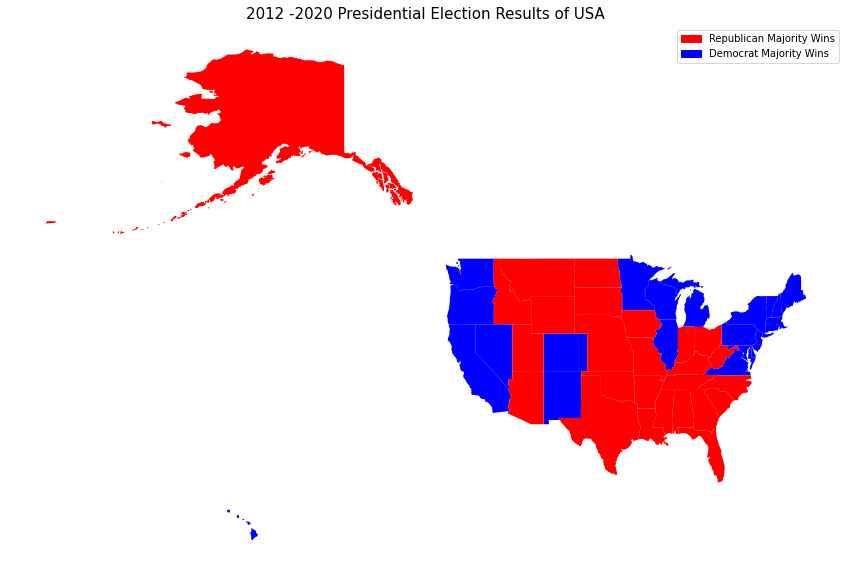

In [ ]:
#including the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #for geopandas legend
from os.path import join

%matplotlib inline

In [ ]:
#mounting the drive in order to access the dataset.
from google.colab import drive 
drive.mount("./drive")

path_prefix = "./drive/My Drive/CS210 Proje"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
#Deciding winners based on 3 elections. Winner = most wins over 3 elections
states = df.state.unique().tolist()
state_po = df.state_po.unique().tolist()
winners = []
years = [2012,2016,2020]
for state in states:
  parties = []
  for year in years:
    row = df.loc[(df["state"] == state) & (df["year"] == year)]
    parties.append(row.loc[row["candidatevotes"].max()==row["candidatevotes"]]["party_simplified"].values[0])
  winners.append(parties)
for i in range(len(winners)): 
  winners[i]= max(set(winners[i]), key=winners[i].count)
elctn_df = pd.DataFrame(list(zip(states, state_po, winners)), columns =['States', "State_Po", 'Winners'])
elctn_df.head()

,States,State_Po,Winners
0,ALABAMA,AL,REPUBLICAN
1,ALASKA,AK,REPUBLICAN
2,ARIZONA,AZ,REPUBLICAN
3,ARKANSAS,AR,REPUBLICAN
4,CALIFORNIA,CA,DEMOCRAT


In [ ]:
!pip install geopandas

import geopandas as gpd

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 37.2 MB/s 
     |████████████████████████████████| 15.4 MB 38.5 MB/s 


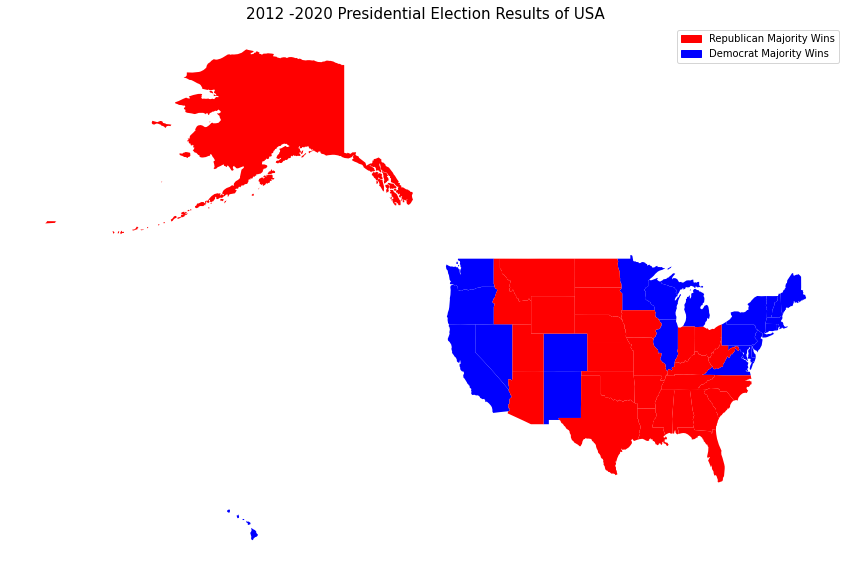

In [ ]:
#Plotting USA State map wrt winners of last 3 elections (Winner = most wins over 3 elections)
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
usa = gpd.read_file(url)
usa = usa[(usa.name!="District of Columbia")]
usa = usa[(usa.name!="Puerto Rico")]
usa = usa.reset_index()
usa["Winners"] = elctn_df["Winners"]

fig, ax = plt.subplots(figsize=(15, 15))

colors = {'DEMOCRAT': 'blue','REPUBLICAN': 'red'}
for ctype, data in usa.groupby('Winners'):
    color = colors[ctype]
    data.plot(color=color, ax=ax, label = ctype)

#for legend
republicans = mpatches.Patch(color='red', label='Republican Majority Wins')
democrats = mpatches.Patch(color = 'blue', label = 'Democrat Majority Wins')

plt.legend(handles = [republicans, democrats])
plt.title("2012 -2020 Presidential Election Results of USA", fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax.set_axis_off()
#plt.savefig(join(path_prefix, 'Election_Results.png'), bbox_inches='tight') #UNCOMMENT TO REPRODUCE PNG
plt.show()

####Vaccine Dataset
This section includes the workflow for EDA Analysis of the **US COVID Vaccination** dataset.

1. Decide rates by line fitting (also plot fitted graph for each state)

2. Associate rates with labels provided above

3. Find means + std for both labels (for two sample t-test)



In [ ]:
#including the necessary libraries.
import pandas as pd
import numpy as np
import warnings
from scipy import stats 
import matplotlib.pyplot as plt
from os.path import join

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#mounting the drive in order to access the dataset.
from google.colab import drive 
drive.mount("./drive")

path_prefix = "./drive/My Drive/CS210 Proje"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
#get cleaned table from repo
filename = "COVID-19_Vaccinations_in_the_United_States_County_cleaned.csv"
cleanedTable = pd.read_csv(join(path_prefix, filename))
cleanedTable.head()

,Unnamed: 0,Recip_State,Recip_County,Series_Complete_Yes,Date
0,1138583,AK,Aleutians East Borough,0,2020-12-13
1,1134481,AK,Aleutians East Borough,0,2020-12-14
2,1130952,AK,Aleutians East Borough,0,2020-12-15
3,1127133,AK,Aleutians East Borough,0,2020-12-16
4,1124004,AK,Aleutians East Borough,0,2020-12-17


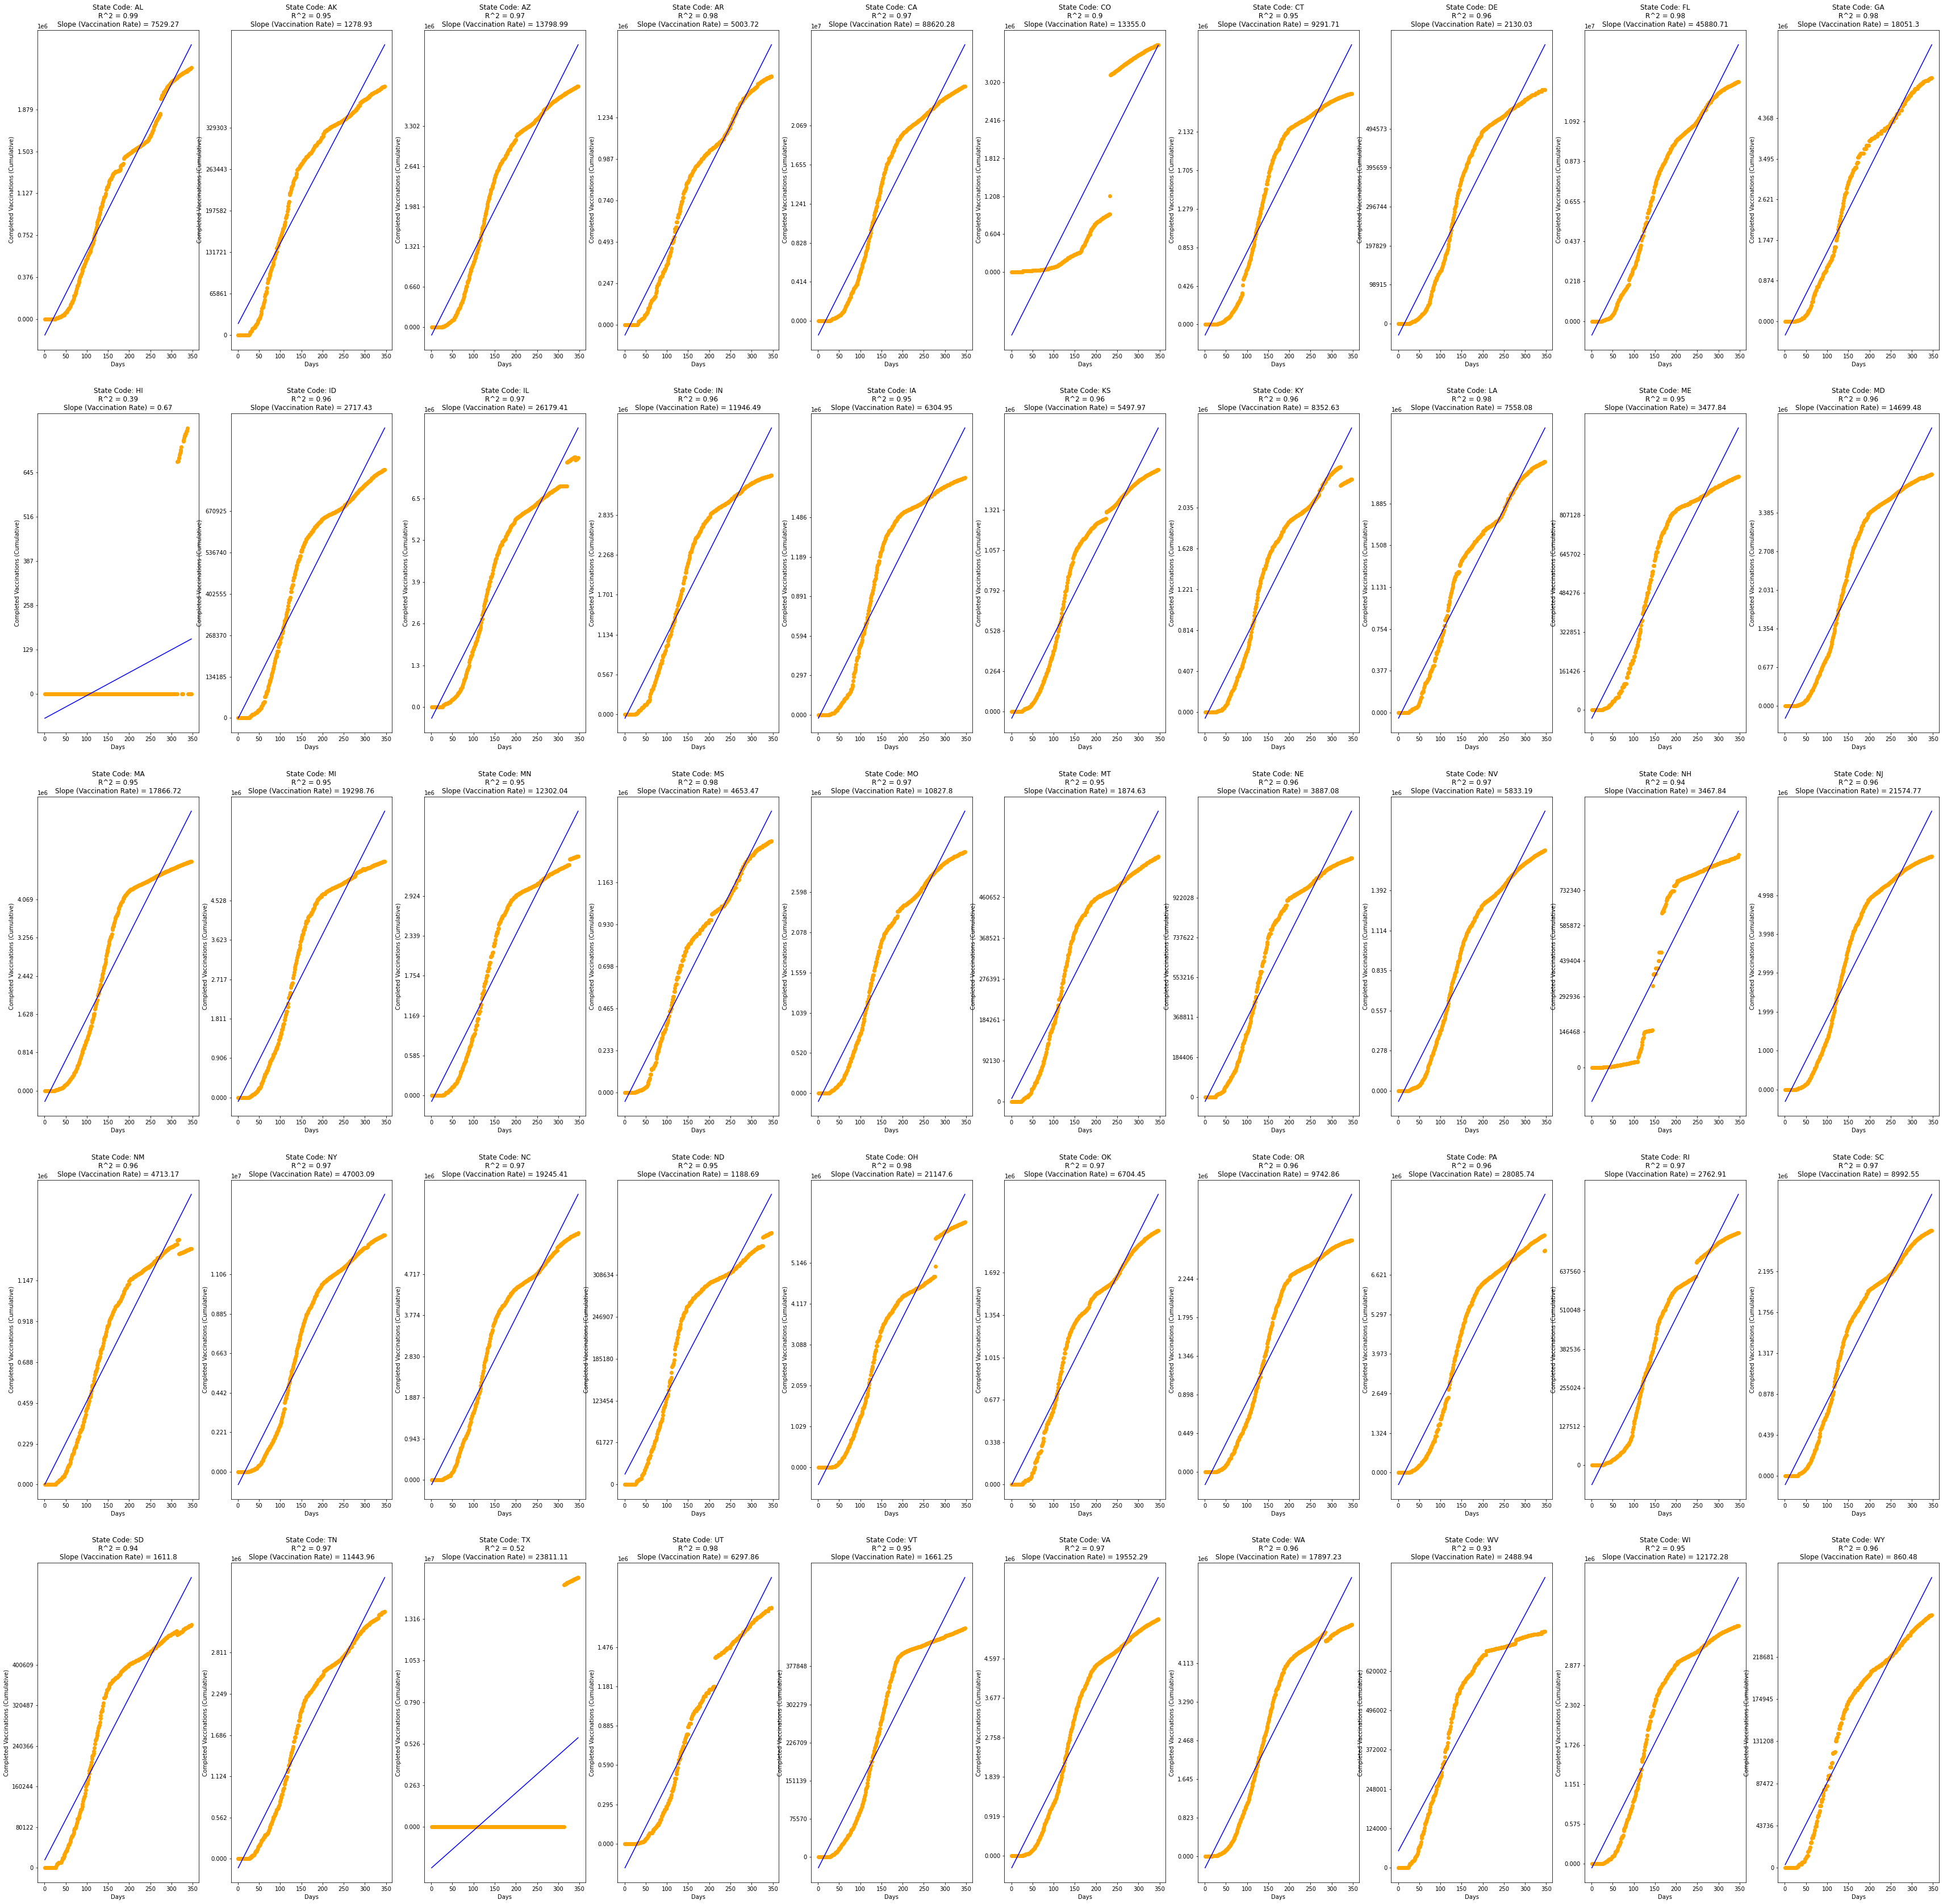

In [ ]:
#we will not need to work with counties, so first groupby state
stateGroups = cleanedTable.groupby("Recip_State")

#we need to get the date range of our dataset as well
dateArray = np.unique(cleanedTable["Date"].values)

#initialize plots
fig, ax = plt.subplots(5, 10, figsize = (60,60))
axisTracker = 0 #to track plot axis

#initialize dict which will be added to elctn_df for hypothesis testing
vaxRateDict = {}

#now note that vax dataset has 60 states (50 states and 10 territories)
#therefore we will only consider the 50 states coming from elctn_df
for state in elctn_df["State_Po"].values:
  tempGroup = stateGroups.get_group(state)
  tempCumulativeArray = []
  
  #Now what we do is sum all counties in state to get the state sum. 
  for date in dateArray:
    daySubset = tempGroup[tempGroup["Date"] == date]
    tempCumulativeArray.append(sum(daySubset["Series_Complete_Yes"].values))
  
  #now to get data and plot
  tempCumulativeArray = np.array(tempCumulativeArray)
  x = np.arange(1, len(tempCumulativeArray)+1)
  ax[axisTracker // 10][axisTracker % 10].scatter(x, tempCumulativeArray, color = 'orange', label = 'Data Points')

  #to plot line fit, use linear regression from scipy package
  res = stats.linregress(x, tempCumulativeArray)
  ax[axisTracker // 10][axisTracker % 10].plot(x, res.intercept + res.slope*x, 'r', label = 'Line Fit', color = 'blue')

  ax[axisTracker // 10][axisTracker % 10].set_title("State Code: " + str(state) + '\nR^2 = ' + str(np.round(res.rvalue, 2)) + "\nSlope (Vaccination Rate) = " + str(np.round(res.slope,2)))
  ax[axisTracker // 10][axisTracker % 10].set_yticks(np.arange(min(tempCumulativeArray), max(tempCumulativeArray), (max(tempCumulativeArray)-min(tempCumulativeArray))/6))
  ax[axisTracker // 10][axisTracker % 10].set_xlabel('Days')
  ax[axisTracker // 10][axisTracker % 10].set_ylabel('Completed Vaccinations (Cumulative)')

  #save to dict
  vaxRateDict[str(state)] = np.round(res.slope,2) 

  #increment axis
  axisTracker += 1

#plt.savefig(join(path_prefix,"Subplots_trial.png"), bbox_inches = 'tight') //UNCOMMENT TO REPRODUCE PNG FILE
plt.show()

In [ ]:
#TX & HI potential outliers
#Now that we have the vaccination rates, append this dict to elctn_df
elctn_df["Vaccination_Rate"] = elctn_df["State_Po"].apply(lambda x: vaxRateDict[x])
elctn_df.head()

,States,State_Po,Winners,Vaccination_Rate
0,ALABAMA,AL,REPUBLICAN,7529.27
1,ALASKA,AK,REPUBLICAN,1278.93
2,ARIZONA,AZ,REPUBLICAN,13798.99
3,ARKANSAS,AR,REPUBLICAN,5003.72
4,CALIFORNIA,CA,DEMOCRAT,88620.28


In [ ]:
#Find mean, std for groups REPUBLICAN/DEMOCRAT
grouped = elctn_df.groupby(['Winners'])['Vaccination_Rate']
statTable = grouped.agg(['mean', 'std'])
statTable.head()

#Here we observe that mean(D) > mean(R), hence this will be our alternative hypothesis. 

,mean,std
Winners,,
DEMOCRAT,16595.154783,19108.608016
REPUBLICAN,9590.974074,9642.612282


#### USA State Demographics Dataset
This section includes the workflow for EDA Analysis of the **US State Demographics** dataset.

1. Plot correlation matrix for different features across states

2. Plot boxplots for different features across states 

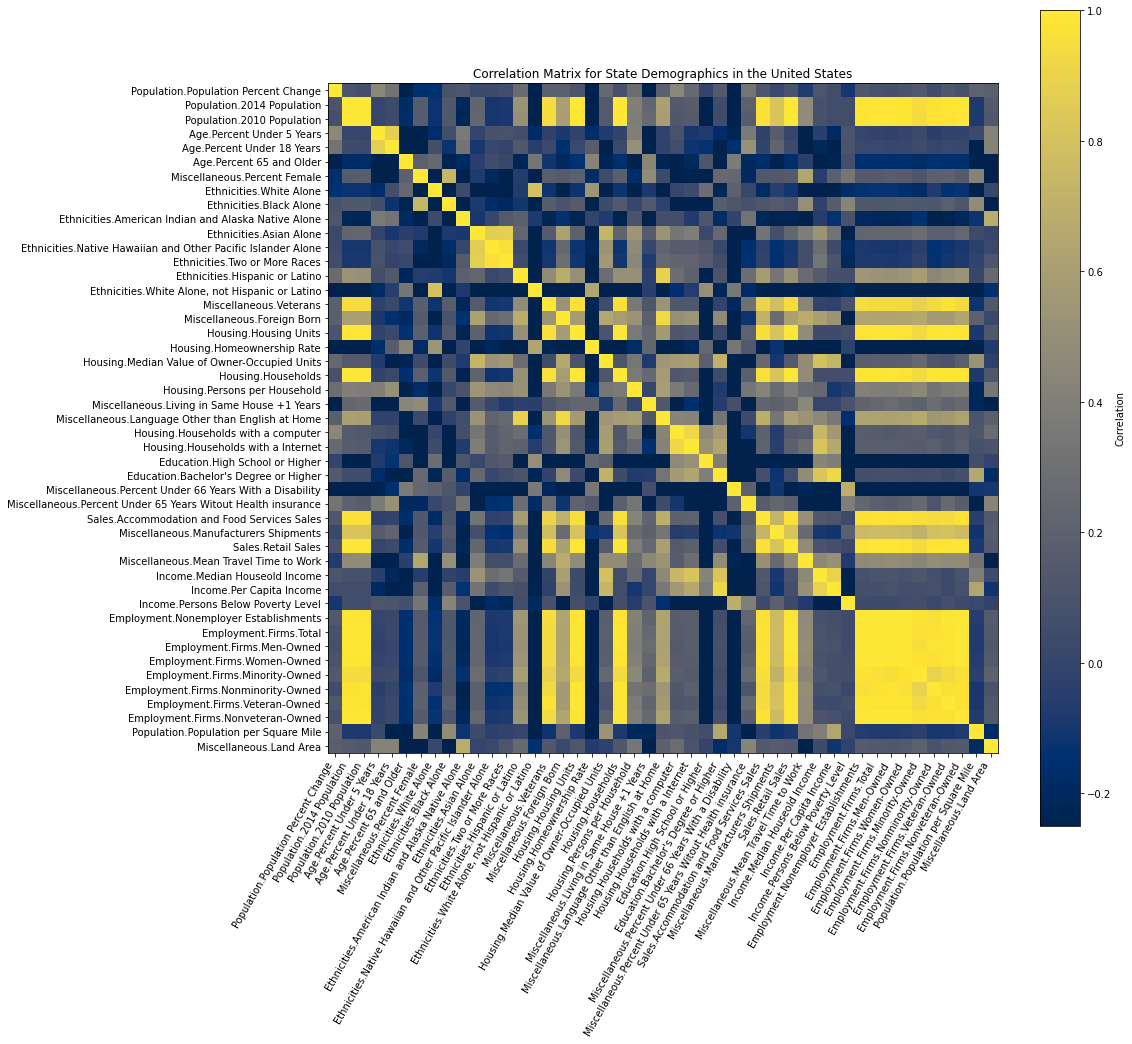

In [ ]:
#including the necessary libraries.
import pandas as pd
import numpy as np
import warnings
from scipy import stats 
import matplotlib.pyplot as plt
from os.path import join

warnings.filterwarnings('ignore')
%matplotlib inline
#mounting the drive in order to access the dataset.
from google.colab import drive 
drive.mount("./drive")

path_prefix = "./drive/My Drive/CS210 Proje"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
#get state demographics from repo
stateDemo = pd.read_csv(join(path_prefix, "state_demographics_twoletter.csv"))
stateDemo.head()

,State,Population.Population Percent Change,Population.2014 Population,Population.2010 Population,Age.Percent Under 5 Years,Age.Percent Under 18 Years,Age.Percent 65 and Older,Miscellaneous.Percent Female,Ethnicities.White Alone,Ethnicities.Black Alone,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.Hispanic or Latino,"Ethnicities.White Alone, not Hispanic or Latino",Miscellaneous.Veterans,Miscellaneous.Foreign Born,Housing.Housing Units,Housing.Homeownership Rate,Housing.Median Value of Owner-Occupied Units,Housing.Households,Housing.Persons per Household,Miscellaneous.Living in Same House +1 Years,Miscellaneous.Language Other than English at Home,Housing.Households with a computer,Housing.Households with a Internet,Education.High School or Higher,Education.Bachelor's Degree or Higher,Miscellaneous.Percent Under 66 Years With a Disability,Miscellaneous.Percent Under 65 Years Witout Health insurance,Sales.Accommodation and Food Services Sales,Miscellaneous.Manufacturers Shipments,Sales.Retail Sales,Miscellaneous.Mean Travel Time to Work,Income.Median Houseold Income,Income.Per Capita Income,Income.Persons Below Poverty Level,Employment.Nonemployer Establishments,Employment.Firms.Total,Employment.Firms.Men-Owned,Employment.Firms.Women-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned,Population.Population per Square Mile,Miscellaneous.Land Area
0,CT,-10.2,3605944,3574097,5.1,20.4,17.7,51.2,79.7,12.2,0.6,5.0,0.1,2.5,16.9,65.9,167521,14.6,1524992,66.1,275400,1370746,2.53,87.9,22.3,90.8,85.5,90.6,39.3,7.4,7.0,9542068,55160095,51632467,26.6,78444,44496,10.0,286874,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36
1,DE,8.4,989948,897934,5.6,20.9,19.4,51.7,69.2,23.2,0.7,4.1,0.1,2.7,9.6,61.7,65438,9.6,443781,71.2,251100,363322,2.57,87.4,13.3,91.6,85.0,90.0,32.0,8.7,8.1,2148437,22597384,14456001,26.3,68287,35450,11.3,68623,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54
2,DC,17.3,689545,601723,6.4,18.2,12.4,52.6,46.0,46.0,0.6,4.5,0.1,2.9,11.3,37.5,26156,13.7,322793,41.6,601500,284386,2.30,80.5,17.2,91.8,82.6,90.9,58.5,8.5,3.9,5101602,309832,4439933,30.8,86420,56147,13.5,62583,63408,30237,27064,29983,29521,5070,54217,9856.5,61.05
3,FL,14.2,21538187,18801310,5.3,19.7,20.9,51.1,77.3,16.9,0.5,3.0,0.1,2.2,26.4,53.2,1440338,20.7,9673682,65.4,215300,7736311,2.65,84.5,29.4,91.5,83.0,88.2,29.9,8.6,16.3,49817925,96924106,273867145,27.8,55660,31619,12.7,2388050,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76
4,GA,9.6,10711908,9687653,6.2,23.6,14.3,51.4,60.2,32.6,0.5,4.4,0.1,2.2,9.9,52.0,629302,10.1,4378391,63.3,176000,3758798,2.70,84.9,14.0,90.2,81.3,87.1,31.3,8.7,15.5,18976611,155836792,119801495,28.8,58700,31067,13.3,955621,929864,480578,376506,371588,538893,96787,800585,168.4,57513.49


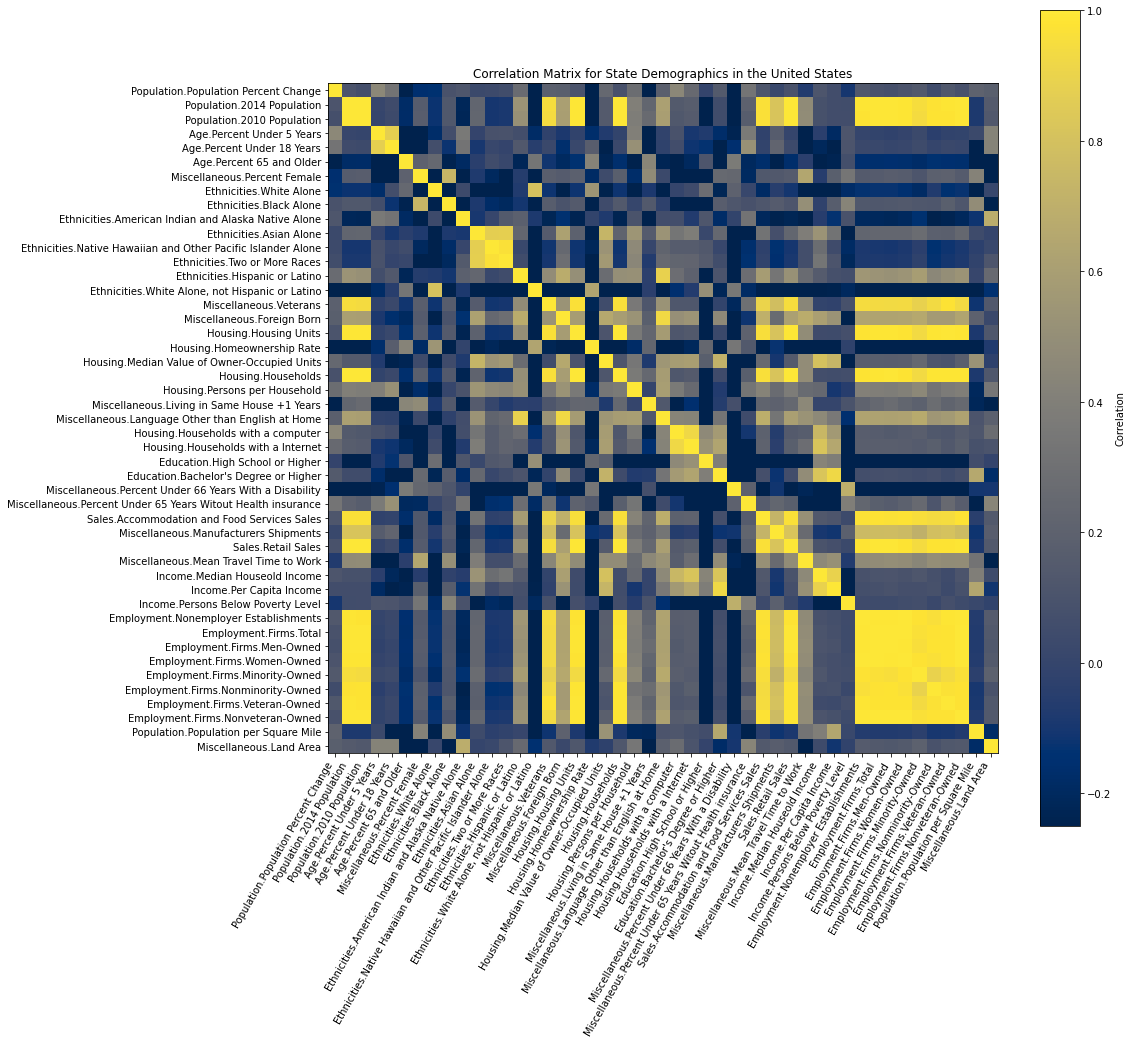

In [ ]:
#get the corellation matrix for features
corrStateDemo = stateDemo.drop("State", axis = 1).corr()

#construct figure
fig, ax = plt.subplots(figsize=(15, 15)) #main body
mapped = ax.imshow(corrStateDemo, cmap="cividis") #plot
mapped.set_clim(-0.25, 1) #color bar limits
cbar = fig.colorbar(mapped) #color bar
cbar.set_label("Correlation") #title for color bar

#labels
ax.set_xticks(np.arange(47))
ax.set_yticks(np.arange(47))
ax.set_xticklabels(list(corrStateDemo.columns))
ax.set_yticklabels(list(corrStateDemo.columns))

ax.set_title("Correlation Matrix for State Demographics in the United States") #main title
plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right') #rotate x axis for overlap

#plt.savefig(join(path_prefix,"State_demographics_corr_matrix.png"), bbox_inches = 'tight') #UNCOMMENT TO REPRODUCE PNG
plt.show()

#### Hypothesis Testing 
First of all, note that there are 50 states and 2 labels (DEMOCRAT/REPUBLICAN), hence at least one of the groups will have size < 30. Therefore, we need to use **two sample t-test** for mean comparison.

Here are the hypotheses:
 


>$\large{H_0}$: $\large{\mu_D}$ = $\large{\mu_R}$  (Mean Vaccination Rate for **Republican States** is **equal to** the Mean Vaccination Rate for **Democrat States**.)



>$\large{H_A}$: $\large{\mu_D}$ $\geq$ $\large{\mu_R}$  (Mean Vaccination Rate for **Democrat States** is **greater than** the Mean Vaccination Rate for **Republican States**.)


Additionally, our significance levels will be **$\large{\alpha_1}$ = 0.05** and **$\large{\alpha_2}$ = 0.075**.

*Sidenote: We will assume that population variances are **EQUAL**. (The proportion of variances is ~3.92 with some outlier states)* 

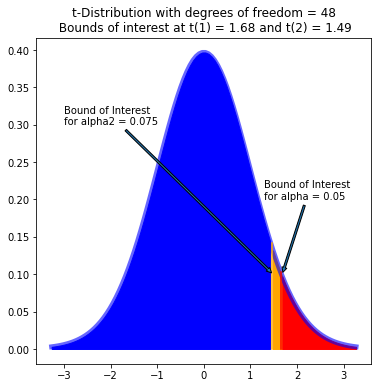

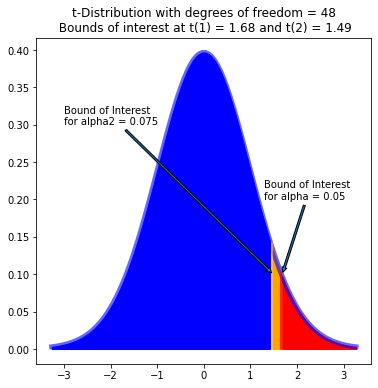

In [ ]:
#Define the samples

##Democrat Sample
meanDemocrat = statTable["mean"]["DEMOCRAT"]
stdDemocrat = statTable["std"]["DEMOCRAT"]
sizeDemocrat = len(elctn_df[elctn_df["Winners"] == "DEMOCRAT"].values) #n = 23 for DEMOCRAT sample

##Republican Sample
meanRepublican = statTable["mean"]["REPUBLICAN"]
stdRepublican = statTable["std"]["REPUBLICAN"]
sizeRepublican = len(elctn_df[elctn_df["Winners"] == "REPUBLICAN"].values) #n = 27 for REPUBLICAN sample



#Get the parameters necessary for t-dist plot
degreesOfFreedom = sizeRepublican + sizeDemocrat - 2 #degrees of freedom
alpha = 0.05 #our preset significance value
alpha2 = 0.075 #second sig value (more relaxed) 

##Plot t distribution with given degreesOfFreedom
fig, ax = plt.subplots(figsize = (6, 6))

mean, var, skew, kurt = stats.t.stats(degreesOfFreedom, moments='mvsk')
x = np.linspace(stats.t.ppf(0.001, degreesOfFreedom), stats.t.ppf(0.999, degreesOfFreedom), 100)

ax.plot(x, stats.t.pdf(x, degreesOfFreedom), 'r-', lw=5, alpha=0.6, color = 'blue')

#Here we get %90 interval inbetween, we are only interested in the %5 on right-tail
noInterestInterval = stats.t.interval(1 - 2*alpha, degreesOfFreedom, loc=0, scale=1)
noInterestInterval_relaxed = stats.t.interval(1 - 2*alpha2, degreesOfFreedom, loc=0, scale=1)

x_noInterest = x[x < noInterestInterval[1]] #uninteresting interval, also includes %5 left-tail
x_Interest = x[x > noInterestInterval[1]] #interesting interval

x_noInterest_relaxed = x[x < noInterestInterval_relaxed[1]] #more relaxed version
x_Interest_relaxed = x[x > noInterestInterval_relaxed[1]] #more relaxed version

x_semiInterest = np.linspace(x_Interest_relaxed[0], x_Interest[0], 100)

#Plotting
#alpha = 0.05
ax.fill_between(x_noInterest_relaxed, stats.t.pdf(x_noInterest_relaxed, degreesOfFreedom), color = 'blue') #Fill in for uninteresting region
ax.fill_between(x_semiInterest, stats.t.pdf(x_semiInterest, degreesOfFreedom), color = 'orange') #Fill in for semi-interesting region
ax.fill_between(x_Interest, stats.t.pdf(x_Interest, degreesOfFreedom), color = 'red') #Fill in for interesting region

ax.axvline(x_Interest[0] - 0.02, ymax=0.28, ymin = 0.045, color="red") #Annotate for upper bound of interest (This part is important) 
ax.set_title('t-Distribution with degrees of freedom = ' + str(degreesOfFreedom) + "\n Bounds of interest at t(1) = " + str(np.round(x_Interest[0], 2)) + " and t(2) = " + str(np.round(x_Interest_relaxed[0], 2)))
ax.annotate(
    "Bound of Interest \nfor alpha = " + str(alpha),
    xy=(x_Interest[0], 0.1),
    xytext=(1.3, 0.2), 
    arrowprops={"arrowstyle": "simple"})

#alpha2  = 0.075
ax.axvline(x_Interest_relaxed[0] - 0.02, ymax=0.37, ymin = 0.045, color="orange") #Annotate for upper bound of interest (This part is important) 
ax.annotate(
    "Bound of Interest \nfor alpha2 = " + str(alpha2),
    xy=(x_Interest_relaxed[0], 0.1),
    xytext=(-3, 0.3), 
    arrowprops={"arrowstyle": "simple"}) 


#plt.savefig(join(path_prefix, "t-test graph combined.png"), bbox_inches='tight') #//UNCOMMENT TO REPRODUCE PNG
plt.show()

In [ ]:
#Now to use t-test, calculate the necessary statistics

##Standard Error for our samples with different population variances (assumed)
sigmaHat = (((sizeRepublican-1)*(stdRepublican**2) + (sizeDemocrat-1)*(stdDemocrat**2)) /degreesOfFreedom)**(1/2)  #sigmaHat calculation
standardError = sigmaHat * ((float(1.0/sizeDemocrat) + float(1.0/sizeRepublican))**(1/2))

##Standardized Test Statistic (t) for our sample
t = (meanDemocrat - meanRepublican) / standardError #Here population means were same, so no need to write -0

print("Final t-score is", np.round(t, 2), "\nSignificance lower bound for alpha1 was", np.round(x_Interest[0], 2), "\nSignificance lower bound for alpha2 was", np.round(x_Interest_relaxed[0], 2))

if (t < x_Interest[0]):
  print("\nFailed to reject Null Hypothesis for alpha =", alpha)
else:
  print("\nReject Null Hypothesis for alpha =", alpha)

if (t < x_Interest_relaxed[0]):
  print("\nFailed to reject Null Hypothesis for alpha =", alpha2)
else:
  print("\nReject Null Hypothesis for alpha =", alpha2)

Final t-score is 1.67 
Significance lower bound for alpha1 was 1.68 
Significance lower bound for alpha2 was 1.49

Failed to reject Null Hypothesis for alpha = 0.05

Reject Null Hypothesis for alpha = 0.075


## Machine Learning Models
In light of our hypothesist tests, we will implement the following 2 models:

1. **Random Forest Classifier** trained with **Vaccination Rates** and **additional features from the US State Demographics dataset**.

2. **Decision Tree Classifier** trained only with **Vaccination Rates**.

Both of these models will be trained to predict the **winning party in a given state** (either Democrat or Republican).

### Preliminary Observations
To determine whether the data is homogenous, let us take a look at the class rates below.  

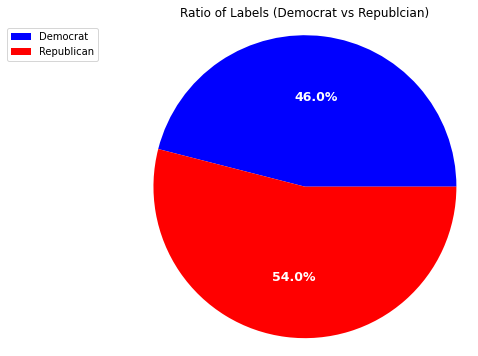

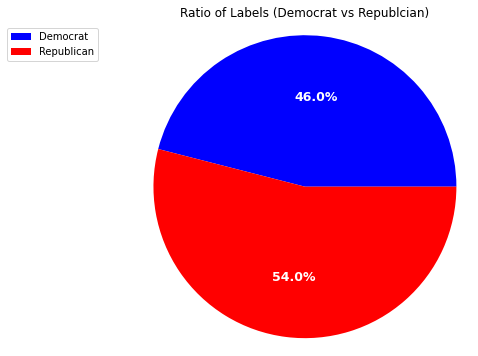

In [ ]:
#get total count and percentages for label
total_count = elctn_df.shape[0]
Democrat_pct = np.round(float(elctn_df[elctn_df["Winners"] == "DEMOCRAT"].shape[0] / total_count) * 100, 1)
Republican_pct = np.round(float(elctn_df[elctn_df["Winners"] == "REPUBLICAN"].shape[0] / total_count) * 100, 1) 

#set params for chart
labels = ["Democrat", "Republican"]
sizes = [Democrat_pct, Republican_pct]
colors = ["blue", "red"]

#plot chart
fig, ax = plt.subplots(figsize = (6,6))
ax.pie(sizes, colors = colors, autopct = "%1.1f%%", textprops={'color':"w", 'weight':'bold', 'fontsize':12.5})
ax.axis('equal')
ax.set_title("Ratio of Labels (Democrat vs Republcian)")

plt.legend(labels = labels, loc = "left center", bbox_to_anchor=(-0.1, 1.))
#plt.savefig(join(path_prefix, 'Ratio of Labels.png'), bbox_inches='tight') #UNCOMMENT TO REPRODUCE PNG

plt.show()

As we can observe from the above figure, there is less than %5 difference between class samples. Hence, we will assume **equal weight**.

### Implementation

#### 1- Random Forest Classifier
The workflow will be as follows:

1. Split data **(20% train, 80% testing)**. Normalize the features before splitting since some of them are percentage based and will be dominated otherwise.


2. Train baseline model and evaluate with respect to (pos_label = "DEMOCRAT" was assumed):
  
  a. Confusion Matrix 
  
  b. ROC Curve

  c. Precision-Recall Curve

  d. Accuracy Score



3. Hyperparameter tuning for the following:

  a. max_depth
  
  b.  max_leaf_nodes
  
  c. n_estimators
  
  d. max_features


4. Evaluation of final model.


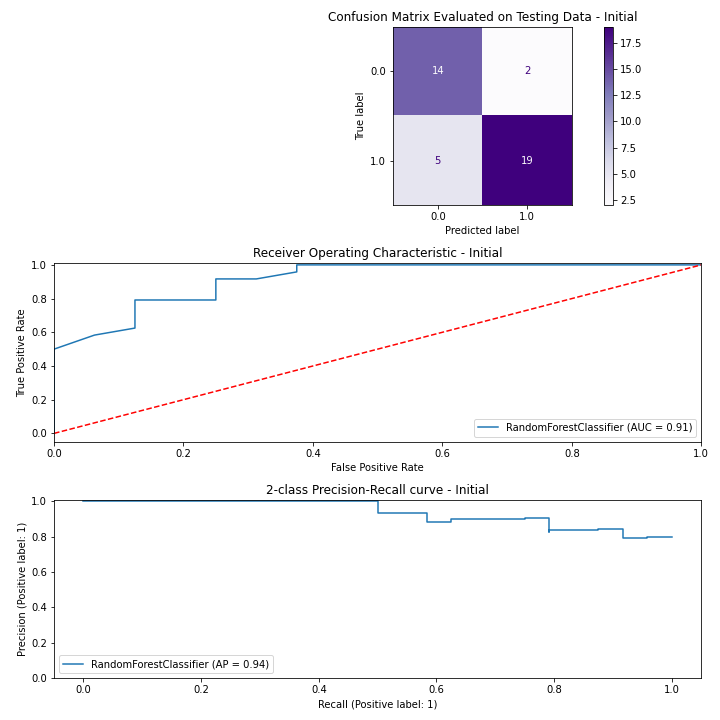




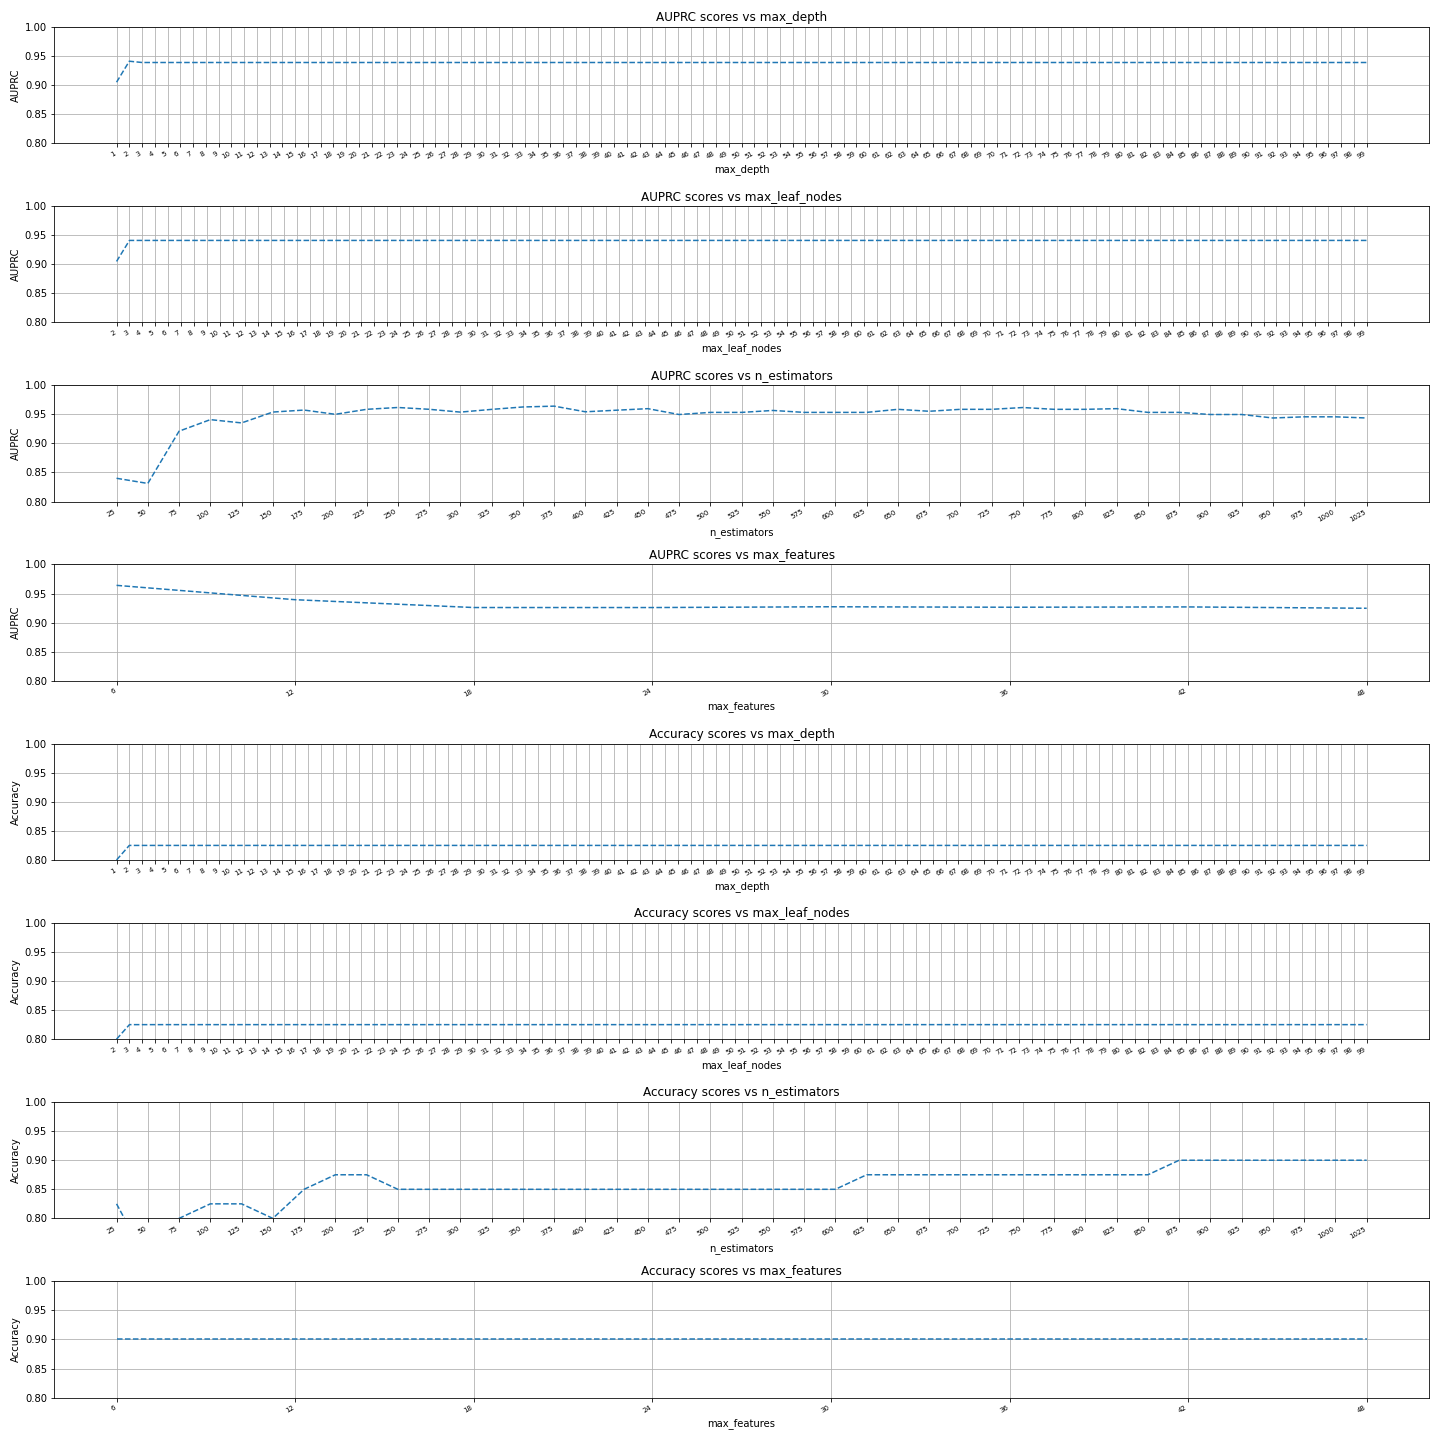


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import accuracy_score



#load extra features data and filter for the states we have
extraFeatures = pd.read_csv(join(path_prefix, "state_demographics_twoletter.csv"))
extraFeatures = extraFeatures[extraFeatures["State"].isin(elctn_df["State_Po"].values)]
extraFeatures.index = np.arange(0, len(extraFeatures))
extraFeatures = extraFeatures.rename({"State": "State_Po"}, axis = 1) #rename to match for merge

#merge extra features with elctn_df and split features and target
mergeDf = pd.merge(elctn_df, extraFeatures, how = "inner", on = "State_Po")

#encode categorical labels (1 for democrat, 0 for Republican)
encoder = OrdinalEncoder()
encoded_input = encoder.fit_transform(mergeDf["Winners"].values.reshape(-1,1))
mergeDf["Winners"] = encoded_input

X = mergeDf.drop(["Winners"], axis = 1)
X.index = X["State_Po"]
X.drop(["States", "State_Po"], axis = 1, inplace = True)
y = mergeDf["Winners"]

X=(X-X.min())/(X.max()-X.min()) #here we apply min max normalization to features, so that percentage based features are not dominated


#train test split twice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)
#X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state  =42)

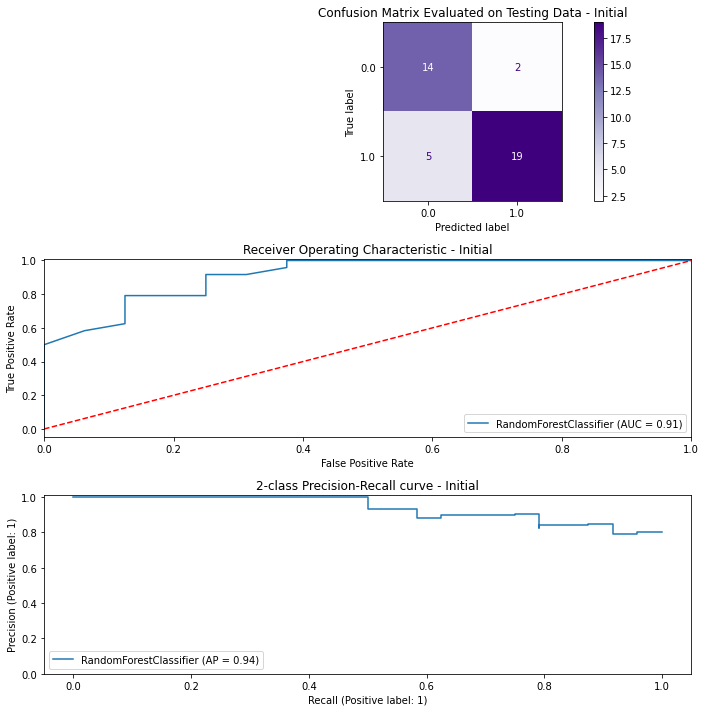

Accuracy Score: 0.825


In [ ]:

#now train the baseline model
randomForestModel = RandomForestClassifier(random_state = 42)
randomForestModel.fit(X_train, y_train)

#evaluate the model on many different aspects
fig,ax = plt.subplots(3,1,figsize = (10,10))

#a. Confusion Matrix
plot_confusion_matrix(randomForestModel, X_test, y_test, cmap = "Purples", ax = ax[0])
ax[0].set_title("Confusion Matrix Evaluated on Testing Data - Initial")

#b. ROC curve
RocCurveDisplay.from_estimator(randomForestModel, X_test, y_test, ax = ax[1], pos_label = 1)
ax[1].plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle = "dashed", color = 'red')
ax[1].set_title("Receiver Operating Characteristic - Initial")
ax[1].set_xlim(left = 0, right = 1)
ax[1].set_ylim(top = 1.01)
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")

#c. Precision Recall curve
PrecisionRecallDisplay.from_estimator(randomForestModel, X_test, y_test, pos_label = 1, ax = ax[2])
ax[2].set_title("2-class Precision-Recall curve - Initial")
ax[2].set_yticks(np.linspace(0,1,6))

plt.subplots_adjust(wspace = 1, hspace = 1)
plt.tight_layout()
plt.savefig(join(path_prefix, "initial_randomForest_description.png")) #UNCOMMENT TO REPRODUCE GRAPH
plt.show()

print("Accuracy Score:", accuracy_score(y_test, randomForestModel.predict(X_test)))


In the above figures, **1.0** stands for **DEMOCRAT** and **0.0** stands for **REPUBLICAN**. In the next part, we will tune hyperparameters considering both **AUPRC scores** and **Accuracy scores** and see which metric is best for us.

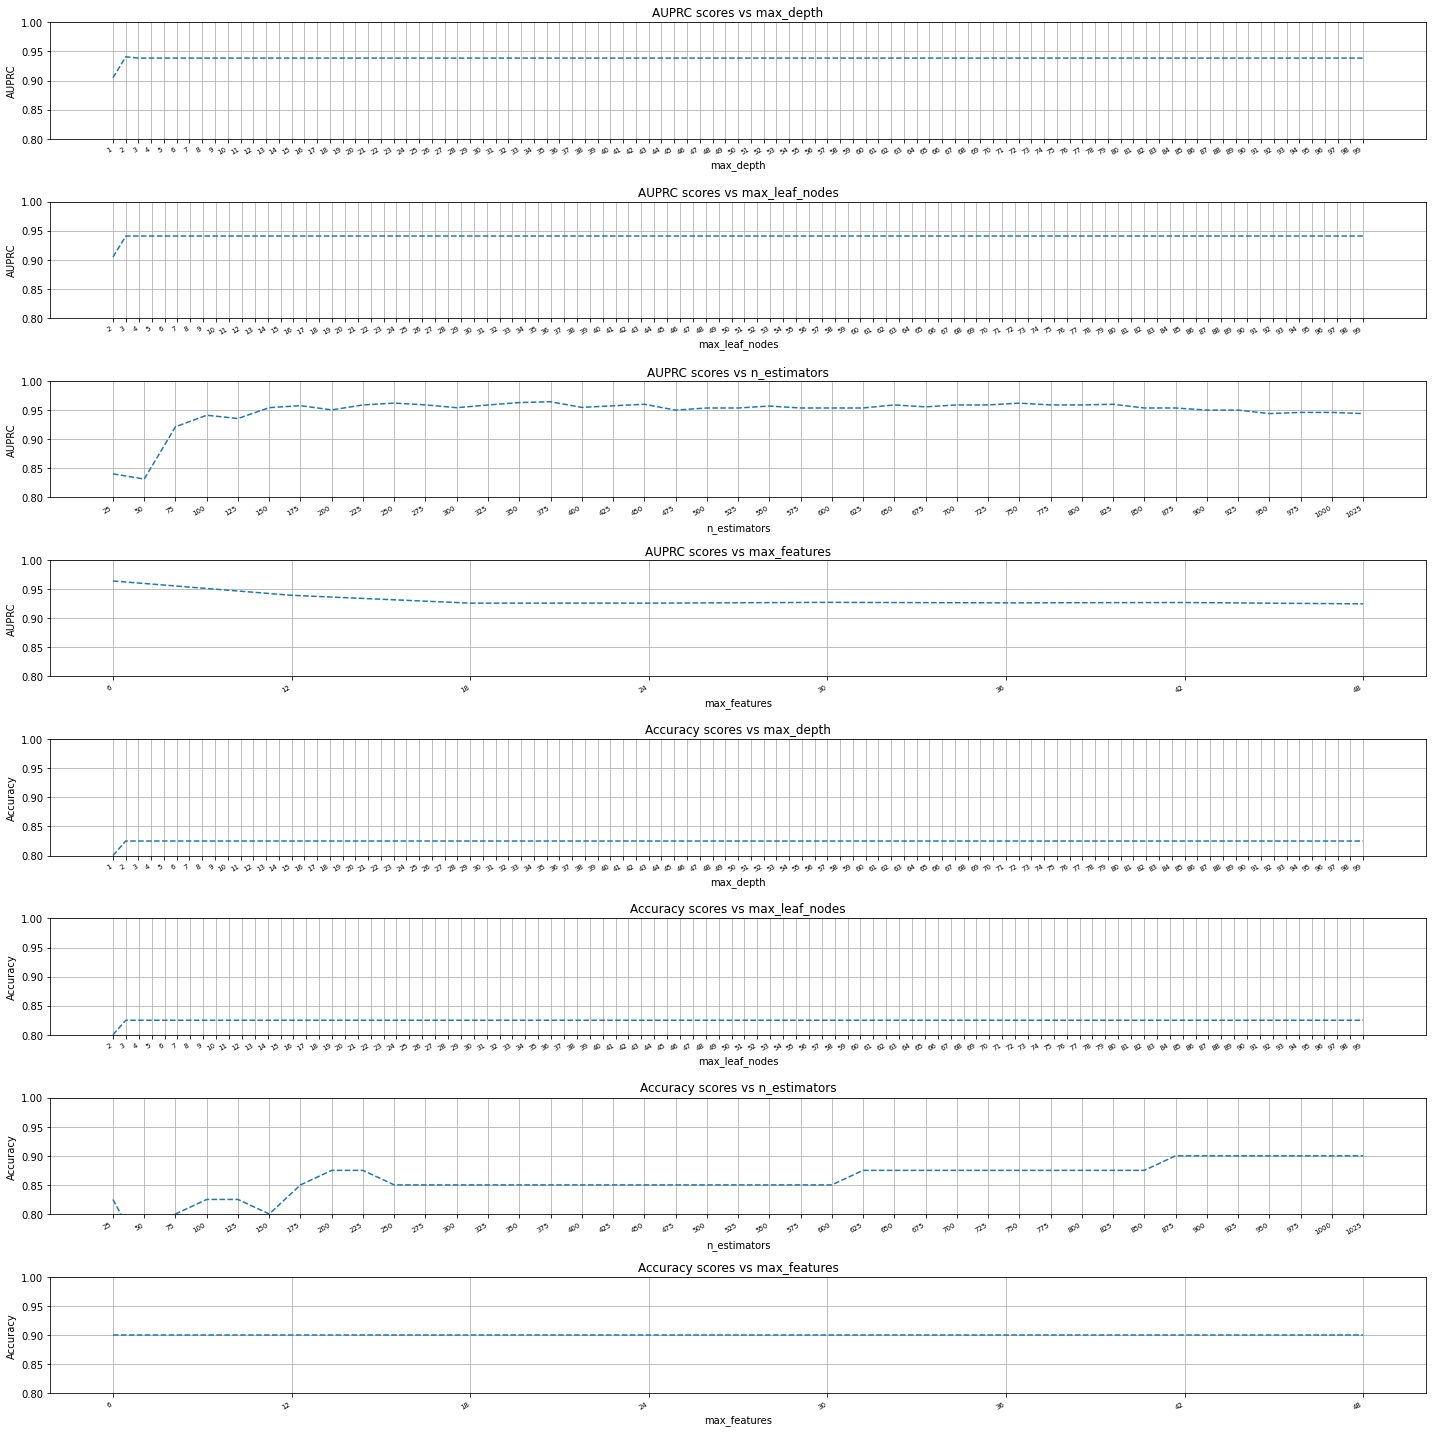

In [ ]:
#function for plots
def plotMaker(axes, axidx, aucDict, typekey, scoretype):
  x_vals = np.array(list(aucDict.keys()))
  y_vals = np.array(list(aucDict.values()))
  axes[axidx].plot(x_vals, y_vals, linestyle = 'dashed')
  axes[axidx].set_ylim(bottom = 0.8, top = 1)  
  axes[axidx].set_xticks(x_vals)
  axes[axidx].grid()
  axes[axidx].set_title( str(scoretype) + " scores vs " + str(typekey))
  axes[axidx].set_xlabel(str(typekey))
  axes[axidx].set_ylabel(str(scoretype))
  plt.setp(axes[axidx].get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')


#tune hyperparameters for the best model
max_depth_group = range(1,100)
max_leaf_nodes_group = range(2,100)
n_estimators_group = np.arange(25, 1050, 25)
max_features_group = np.arange(6,54,6)

auc_values_max_depth = {}
acc_scores_max_depth = {}

auc_values_max_leaf_nodes = {}
acc_scores_max_leaf_nodes = {} 

auc_values_n_estimators = {}
acc_scores_n_estimators = {}

auc_values_max_features = {}
acc_scores_max_features = {}

fig, ax = plt.subplots(8,1,figsize = (20,20))



#hyperparameter 1: max_depth
for depth in max_depth_group:

  randomForestModel = RandomForestClassifier(max_depth = depth, random_state = 42)
  randomForestModel.fit(X_train, y_train)
  
  #AUPRC
  y_pred = randomForestModel.predict_proba(X_test)[:,1]
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label = 1)
  area_under_curve = auc(recall, precision) 
  auc_values_max_depth[depth] = area_under_curve

  #ACC
  acc_score = accuracy_score(y_test, randomForestModel.predict(X_test))
  acc_scores_max_depth[depth] = acc_score
  
  
for key in auc_values_max_depth.keys():
  if auc_values_max_depth[key] == max(list(auc_values_max_depth.values())):
    best_max_depth_auprc = key

for key in acc_scores_max_depth.keys():
  if acc_scores_max_depth[key] == max(list(acc_scores_max_depth.values())):
    best_max_depth_acc = key




#hyperparameter 2: max_leaf_nodes
for leaf_nodes in max_leaf_nodes_group:
  
  #AUPRC
  randomForestModel = RandomForestClassifier(max_depth = best_max_depth_auprc, max_leaf_nodes = leaf_nodes, random_state = 42)
  randomForestModel.fit(X_train, y_train)
  y_pred = randomForestModel.predict_proba(X_test)[:,1]
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label = 1)
  area_under_curve = auc(recall, precision) 
  auc_values_max_leaf_nodes[leaf_nodes] = area_under_curve 

  #ACC
  randomForestModel = RandomForestClassifier(max_depth = best_max_depth_acc, max_leaf_nodes = leaf_nodes, random_state = 42)
  randomForestModel.fit(X_train, y_train)
  acc_score = accuracy_score(y_test, randomForestModel.predict(X_test))
  acc_scores_max_leaf_nodes[leaf_nodes] = acc_score

for key in auc_values_max_leaf_nodes.keys():
  if auc_values_max_leaf_nodes[key] == max(list(auc_values_max_leaf_nodes.values())):
    best_max_leaf_nodes_auprc = key

for key in acc_scores_max_leaf_nodes.keys():
  if acc_scores_max_leaf_nodes[key] == max(list(acc_scores_max_leaf_nodes.values())):
    best_max_leaf_nodes_acc = key




#hyperparameter 3: n_estimators
for n_estimator in n_estimators_group:

  #AUPRC
  randomForestModel = RandomForestClassifier(max_depth = best_max_depth_auprc, max_leaf_nodes = best_max_leaf_nodes_auprc, n_estimators = n_estimator, random_state = 42)
  randomForestModel.fit(X_train, y_train)
  y_pred = randomForestModel.predict_proba(X_test)[:,1]
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label = 1)
  area_under_curve = auc(recall, precision) 
  auc_values_n_estimators[n_estimator] = area_under_curve 

  #ACC
  randomForestModel = RandomForestClassifier(max_depth = best_max_depth_acc, max_leaf_nodes = best_max_leaf_nodes_acc, n_estimators = n_estimator, random_state = 42)
  randomForestModel.fit(X_train, y_train)
  acc_score = accuracy_score(y_test, randomForestModel.predict(X_test))
  acc_scores_n_estimators[n_estimator] = acc_score


for key in auc_values_n_estimators.keys():
  if auc_values_n_estimators[key] == max(list(auc_values_n_estimators.values())):
    best_n_estimators_auprc = key

for key in acc_scores_n_estimators.keys():
  if acc_scores_n_estimators[key] == max(list(acc_scores_n_estimators.values())):
    best_n_estimators_acc = key




#hyperparameter 4: max features
for max_feature in max_features_group:

  #AUPRC
  randomForestModel = RandomForestClassifier(max_depth = best_max_depth_auprc, max_leaf_nodes = best_max_leaf_nodes_auprc, n_estimators = best_n_estimators_auprc, max_features = max_feature, random_state = 42)
  randomForestModel.fit(X_train, y_train)
  y_pred = randomForestModel.predict_proba(X_test)[:,1]
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label = 1)
  area_under_curve = auc(recall, precision) 
  auc_values_max_features[max_feature] = area_under_curve 

  #ACC
  randomForestModel = RandomForestClassifier(max_depth = best_max_depth_acc, max_leaf_nodes = best_max_leaf_nodes_acc, n_estimators = best_n_estimators_acc, max_features = max_feature, random_state = 42)
  randomForestModel.fit(X_train, y_train)
  acc_score = accuracy_score(y_test, randomForestModel.predict(X_test))
  acc_scores_max_features[max_feature] = acc_score


for key in auc_values_max_features.keys():
  if auc_values_max_features[key] == max(list(auc_values_max_features.values())):
    best_max_features_auprc = key


for key in acc_scores_max_features.keys():
  if acc_scores_max_features[key] == max(list(acc_scores_max_features.values())):
    best_max_features_acc = key



#get plots
#AUPRC
plotMaker(ax, 0, auc_values_max_depth, "max_depth", "AUPRC")
plotMaker(ax, 1, auc_values_max_leaf_nodes, "max_leaf_nodes", "AUPRC")
plotMaker(ax, 2, auc_values_n_estimators, "n_estimators", "AUPRC")
plotMaker(ax, 3, auc_values_max_features, "max_features", "AUPRC")

#ACC
plotMaker(ax, 4, acc_scores_max_depth, "max_depth", "Accuracy")
plotMaker(ax, 5, acc_scores_max_leaf_nodes, "max_leaf_nodes", "Accuracy")
plotMaker(ax, 6, acc_scores_n_estimators, "n_estimators", "Accuracy")
plotMaker(ax, 7, acc_scores_max_features, "max_features", "Accuracy")

plt.tight_layout()
plt.savefig(join(path_prefix, "randomForest_hyperparameter_testing.png")) #UNCOMMENT TO REPRODUCE
plt.show()






#### 2- Decision Tree Classifier

The workflow will be as follows:

1.   We need to increase sample size. Therefore, we will make assumption on county labels and we will follow the same procedure we did for the states to find vaccination rates for counties. The county labels will be the same as the state label each county belongs to.

2.   As the sample size changed, we will perform another analysis to see if the classes are equally distributed. If not, we will modify class weights.

3. Train baseline model and tune hyperparameters using 5-fold cross validation with respect to
  
  a. max_depth
  
  b. min_samples_leaf

4. Get final accuracy scores for baseline and tuned model.

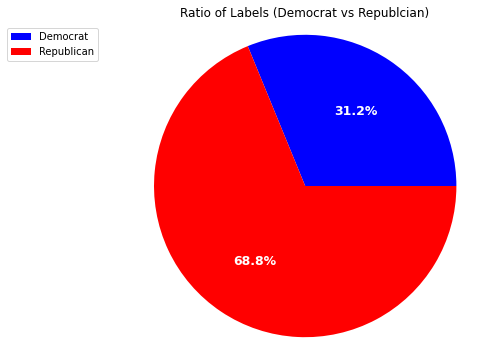

In [ ]:
#we will not need to work with counties, so first groupby state
stateGroups = cleanedTable.groupby("Recip_State")

#we need to get the date range of our dataset as well
dateArray = np.unique(cleanedTable["Date"].values)

protoDataFrame = []
#now note that vax dataset has 60 states (50 states and 10 territories)
#therefore we will only consider the 50 states coming from elctn_df
for state in elctn_df["State_Po"].values:
  tempGroup = stateGroups.get_group(state)

  for county in np.unique(tempGroup["Recip_County"].values):
    row = {}
    tempCountyGroup = tempGroup[tempGroup["Recip_County"] == county]
    tempData = tempCountyGroup["Series_Complete_Yes"].values
    x = np.arange(1, len(tempData)+1)
    state = np.unique(tempCountyGroup["Recip_State"].values)[0] 
    res = stats.linregress(x, tempData)
    vax_rate = res.slope #
    label = elctn_df[elctn_df["State_Po"] == state]["Winners"].values[0] #
    
    row["County_Name"] = county
    row["Vaccination_Rate"] = vax_rate
    row["Label"] = label

    protoDataFrame.append(row)

county_df = pd.DataFrame(protoDataFrame)
county_df.head()

,County_Name,Vaccination_Rate,Label
0,Autauga County,69.346113,REPUBLICAN
1,Baldwin County,336.754186,REPUBLICAN
2,Barbour County,32.595030,REPUBLICAN
3,Bibb County,23.646716,REPUBLICAN
4,Blount County,54.013235,REPUBLICAN


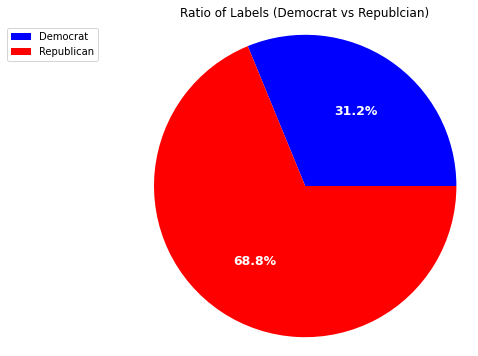

In [ ]:
total_count = county_df.shape[0]
Democrat_pct = np.round(float(county_df[county_df["Label"] == "DEMOCRAT"].shape[0] / total_count) * 100, 1)
Republican_pct = np.round(float(county_df[county_df["Label"] == "REPUBLICAN"].shape[0] / total_count) * 100, 1) 

#set params for chart
labels = ["Democrat", "Republican"]
sizes = [Democrat_pct, Republican_pct]
colors = ["blue", "red"]

#plot chart
fig, ax = plt.subplots(figsize = (6,6))
ax.pie(sizes, colors = colors, autopct = "%1.1f%%", textprops={'color':"w", 'weight':'bold', 'fontsize':12.5})
ax.axis('equal')
ax.set_title("Ratio of Labels (Democrat vs Republcian)")

plt.legend(labels = labels, loc = "left center", bbox_to_anchor=(-0.1, 1.))
plt.savefig(join(path_prefix, 'Ratio of Labels for counties.png'), bbox_inches='tight') #UNCOMMENT TO REPRODUCE PNG

plt.show()

As the classes are inequally distributed now, we will assign class weights as **balanced**.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import accuracy_score

#Defining X and y
X = county_df.drop("Label", axis = 1)
X.index = X["County_Name"]
X = X.drop("County_Name", axis = 1)
y = county_df["Label"]

X=(X-X.min())/(X.max()-X.min()) #min-max normalization

#Splitting set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify = y, random_state=42)

#Defining decision tree classifier and traning baseline
dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
dt.fit(X_train, y_train)

#Setting candidate hyperparameters
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

#Hyperparameter tuning 
grid_search = GridSearchCV(estimator = dt, param_grid = params, cv = 5, n_jobs = -1, verbose = 1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

#Getting the scores for each hyperparameter
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.to_csv(join(path_prefix, "Decision_Tree_scores.csv"))

score_df.nlargest(5,"mean_test_score")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.012802,0.000549,0.004458,0.000066,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.673190,0.634051,0.625490,0.600000,0.639216,0.634389,0.023625,1
25,0.011851,0.000221,0.004267,0.000089,entropy,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.673190,0.634051,0.619608,0.596078,0.641176,0.632821,0.025399,2
14,0.012096,0.000268,0.004499,0.000181,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.669276,0.630137,0.619608,0.596078,0.647059,0.632432,0.024750,3
19,0.011777,0.000141,0.004350,0.000161,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.669276,0.630137,0.619608,0.596078,0.647059,0.632432,0.024750,3
24,0.012306,0.001651,0.005477,0.002239,gini,20,100,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.669276,0.630137,0.619608,0.596078,0.647059,0.632432,0.024750,3


### Results & Discussion



####1- Random Forest Classifier
After utilizing 47 features (including Vaccination Rates), we could achieve 90% accuracy over 40 predictions after tuning hyperparameters with accuracy scores. We also tuned using AUPRC, but accuracy scores were the better metric for our model.

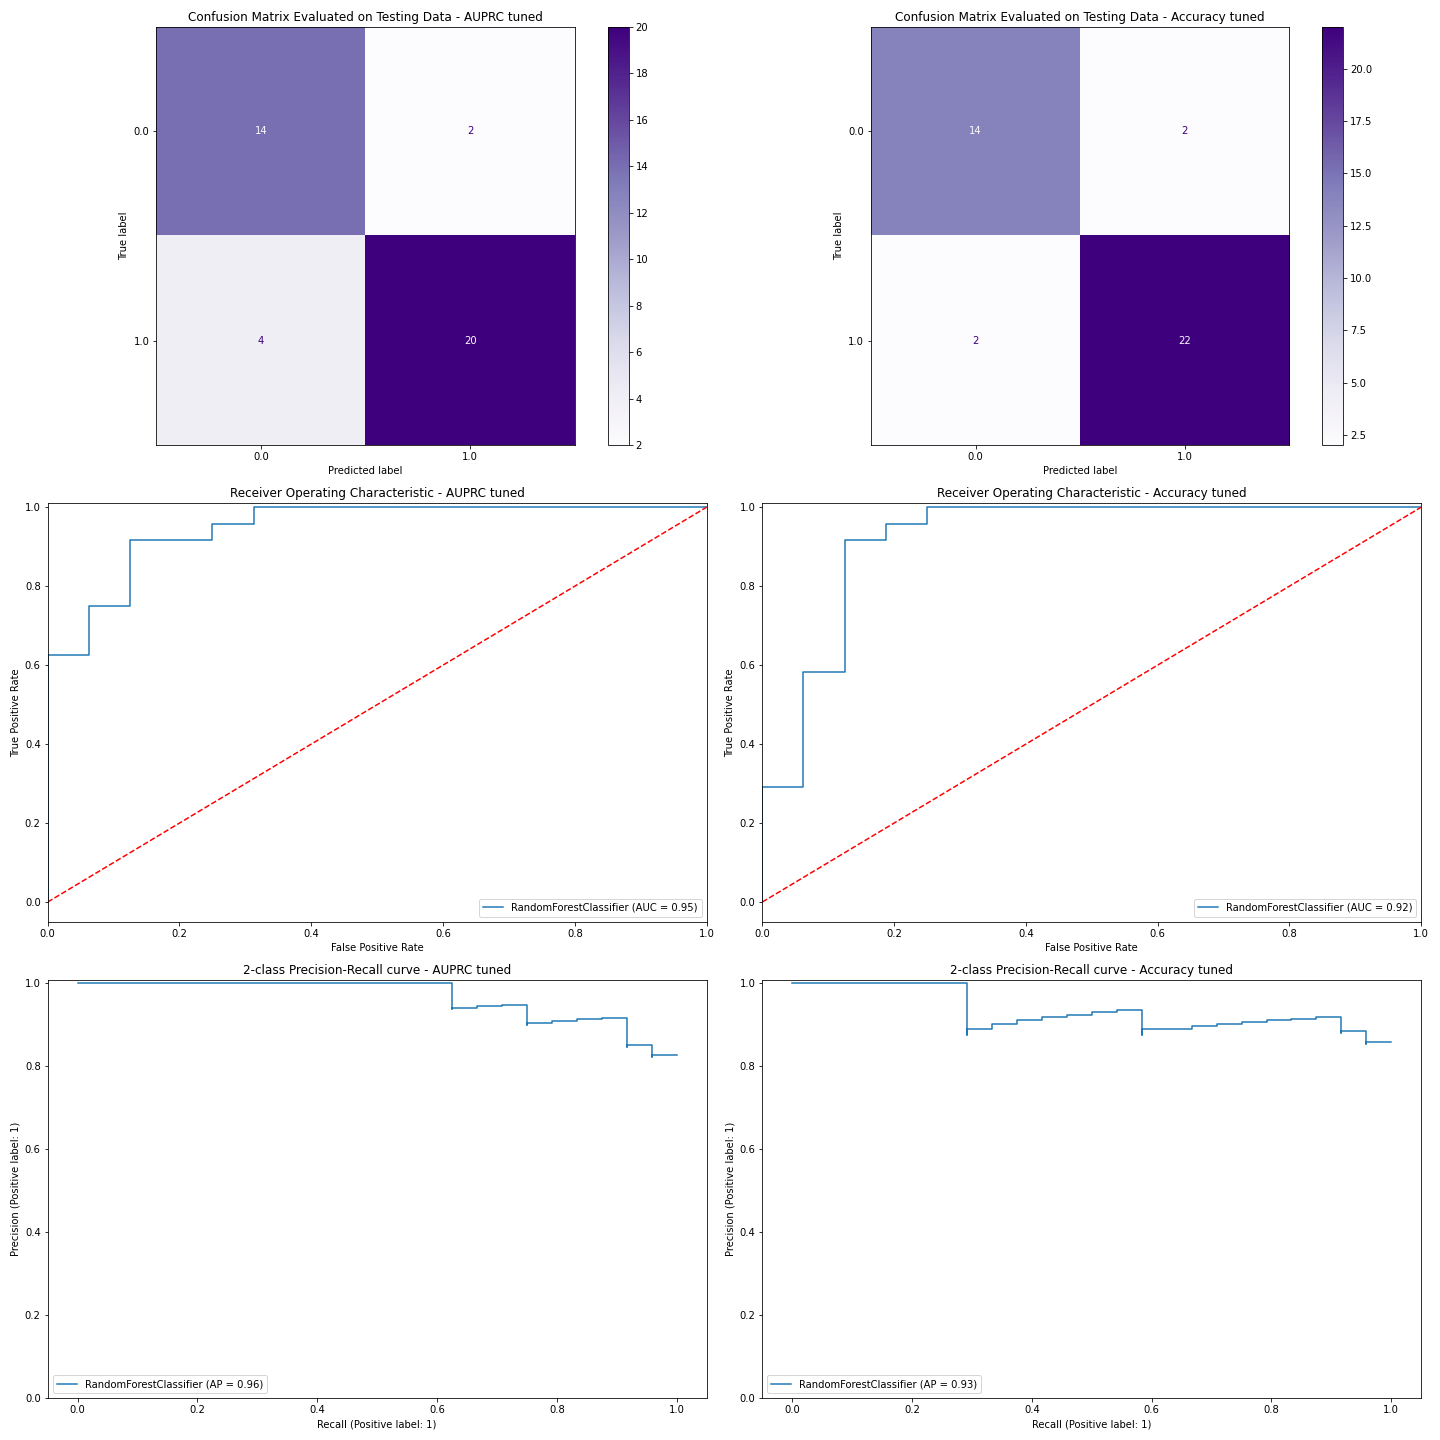

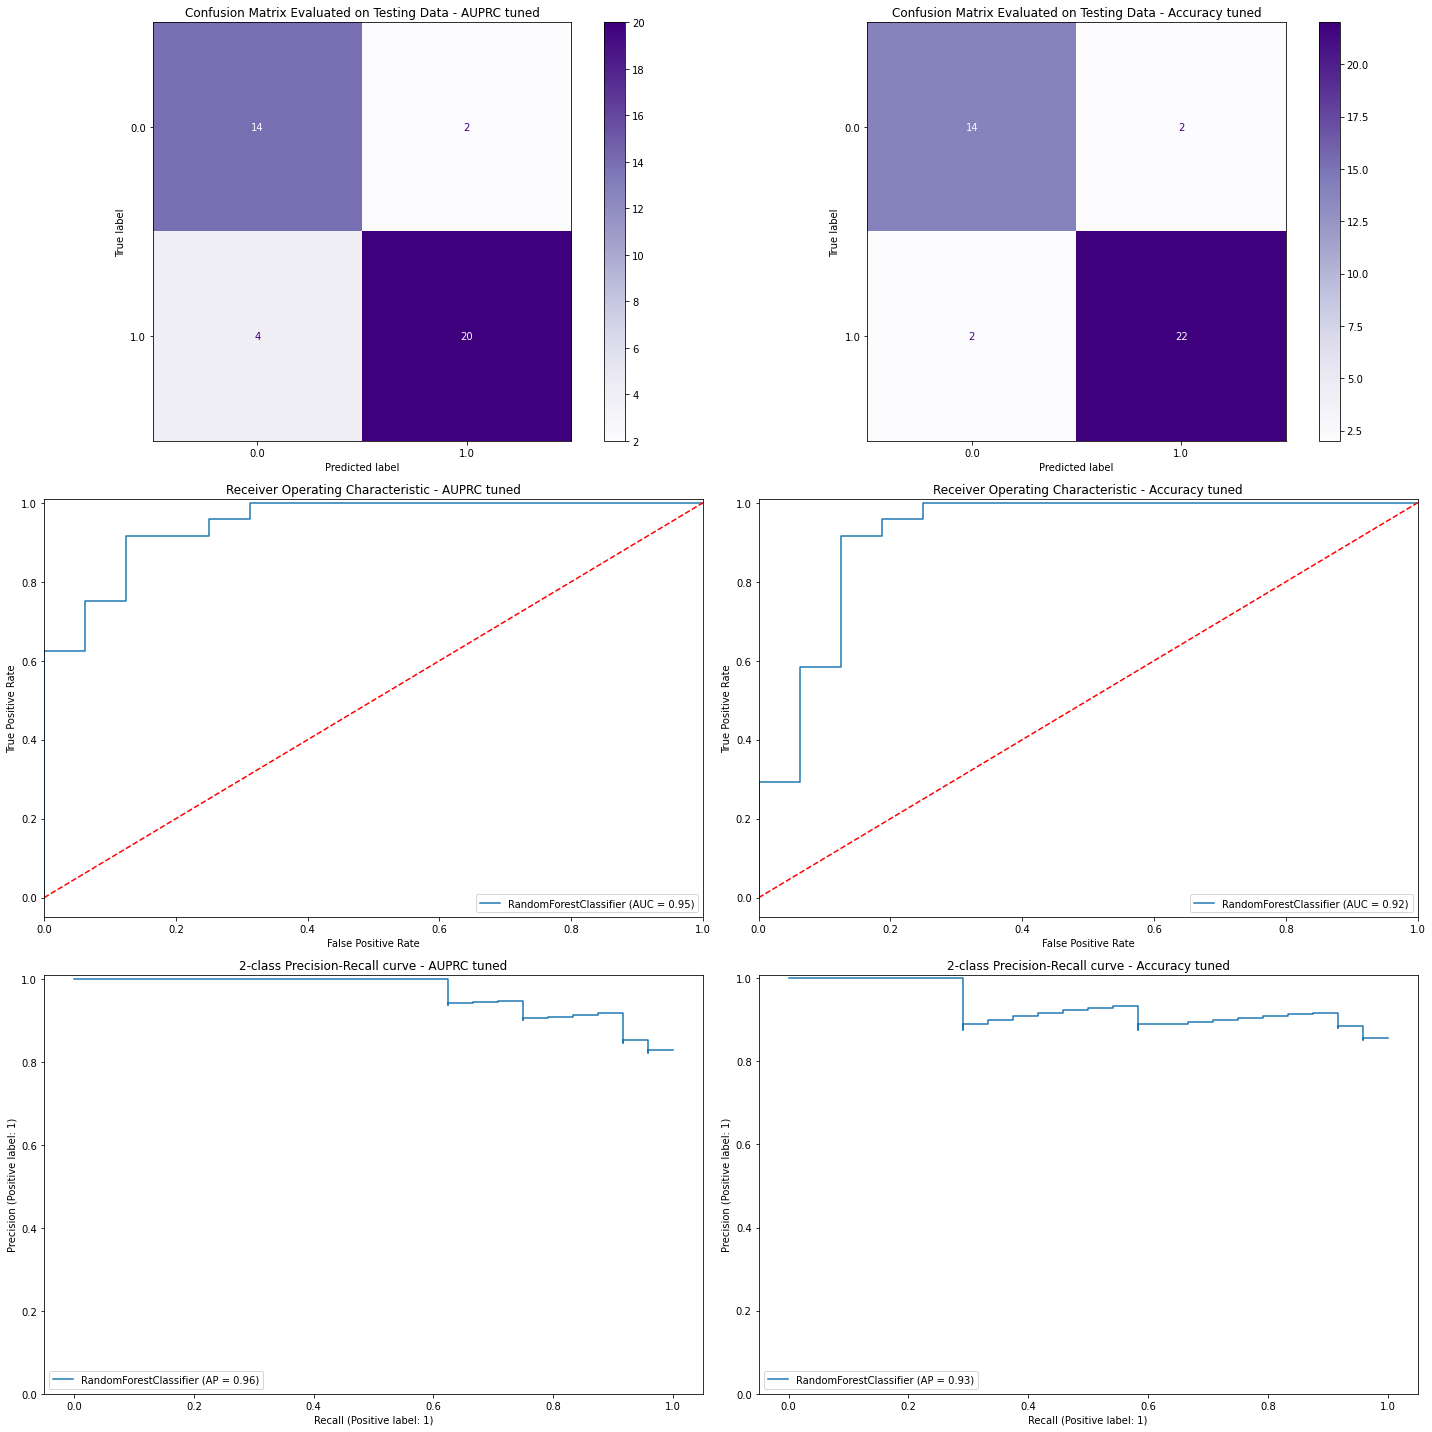

Accuracy Score for AUPRC: 0.85
Accuracy Score for ACC: 0.9


In [ ]:
#final model creation and testing
fig,ax = plt.subplots(3,2,figsize = (20,20))

##AUPRC
randomForestModel = RandomForestClassifier(max_depth = best_max_depth_auprc, max_leaf_nodes = best_max_leaf_nodes_auprc, n_estimators = best_n_estimators_auprc, max_features = best_max_features_auprc, random_state = 42)
randomForestModel.fit(X_train, y_train)
acc_auprc = accuracy_score(y_test, randomForestModel.predict(X_test))

#a. Confusion Matrix
plot_confusion_matrix(randomForestModel, X_test, y_test, cmap = "Purples", ax = ax[0][0])
ax[0][0].set_title("Confusion Matrix Evaluated on Testing Data - AUPRC tuned")

#b. ROC curve
RocCurveDisplay.from_estimator(randomForestModel, X_test, y_test, ax = ax[1][0], pos_label = 1)
ax[1][0].plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle = "dashed", color = 'red')
ax[1][0].set_title("Receiver Operating Characteristic - AUPRC tuned")
ax[1][0].set_xlim(left = 0, right = 1)
ax[1][0].set_ylim(top = 1.01)
ax[1][0].set_xlabel("False Positive Rate")
ax[1][0].set_ylabel("True Positive Rate")

#c. Precision Recall curve
PrecisionRecallDisplay.from_estimator(randomForestModel, X_test, y_test, pos_label = 1, ax = ax[2][0])
ax[2][0].set_title("2-class Precision-Recall curve - AUPRC tuned")
ax[2][0].set_yticks(np.linspace(0,1,6))



##ACC
randomForestModel = RandomForestClassifier(max_depth = best_max_depth_acc, max_leaf_nodes = best_max_leaf_nodes_acc, n_estimators = best_n_estimators_acc, max_features = best_max_features_acc, random_state = 42)
randomForestModel.fit(X_train, y_train)
acc_acc = accuracy_score(y_test, randomForestModel.predict(X_test))

#a. Confusion Matrix
plot_confusion_matrix(randomForestModel, X_test, y_test, cmap = "Purples", ax = ax[0][1])
ax[0][1].set_title("Confusion Matrix Evaluated on Testing Data - Accuracy tuned")

#b. ROC curve
RocCurveDisplay.from_estimator(randomForestModel, X_test, y_test, ax = ax[1][1], pos_label = 1)
ax[1][1].plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), linestyle = "dashed", color = 'red')
ax[1][1].set_title("Receiver Operating Characteristic - Accuracy tuned")
ax[1][1].set_xlim(left = 0, right = 1)
ax[1][1].set_ylim(top = 1.01)
ax[1][1].set_xlabel("False Positive Rate")
ax[1][1].set_ylabel("True Positive Rate")

#c. Precision Recall curve
PrecisionRecallDisplay.from_estimator(randomForestModel, X_test, y_test, pos_label = 1, ax = ax[2][1])
ax[2][1].set_title("2-class Precision-Recall curve - Accuracy tuned")
ax[2][1].set_yticks(np.linspace(0,1,6))


plt.subplots_adjust(wspace = 1, hspace = 1)
plt.tight_layout()
plt.savefig(join(path_prefix, "final_randomForest_description.png")) #UNCOMMENT TO REPRODUCE GRAPH
plt.show()

print("Accuracy Score for AUPRC:", acc_auprc)
print("Accuracy Score for ACC:", acc_acc)

#### 2- Decision Tree Classifier

When we used only **Vaccination Rates** as our feature, after tuning hyperparameters with 5-fold CV, we could achieve 66% accuracy for around 650 predictions. With further tuning, we believe it is possible to increase the accuracy up to 70%.
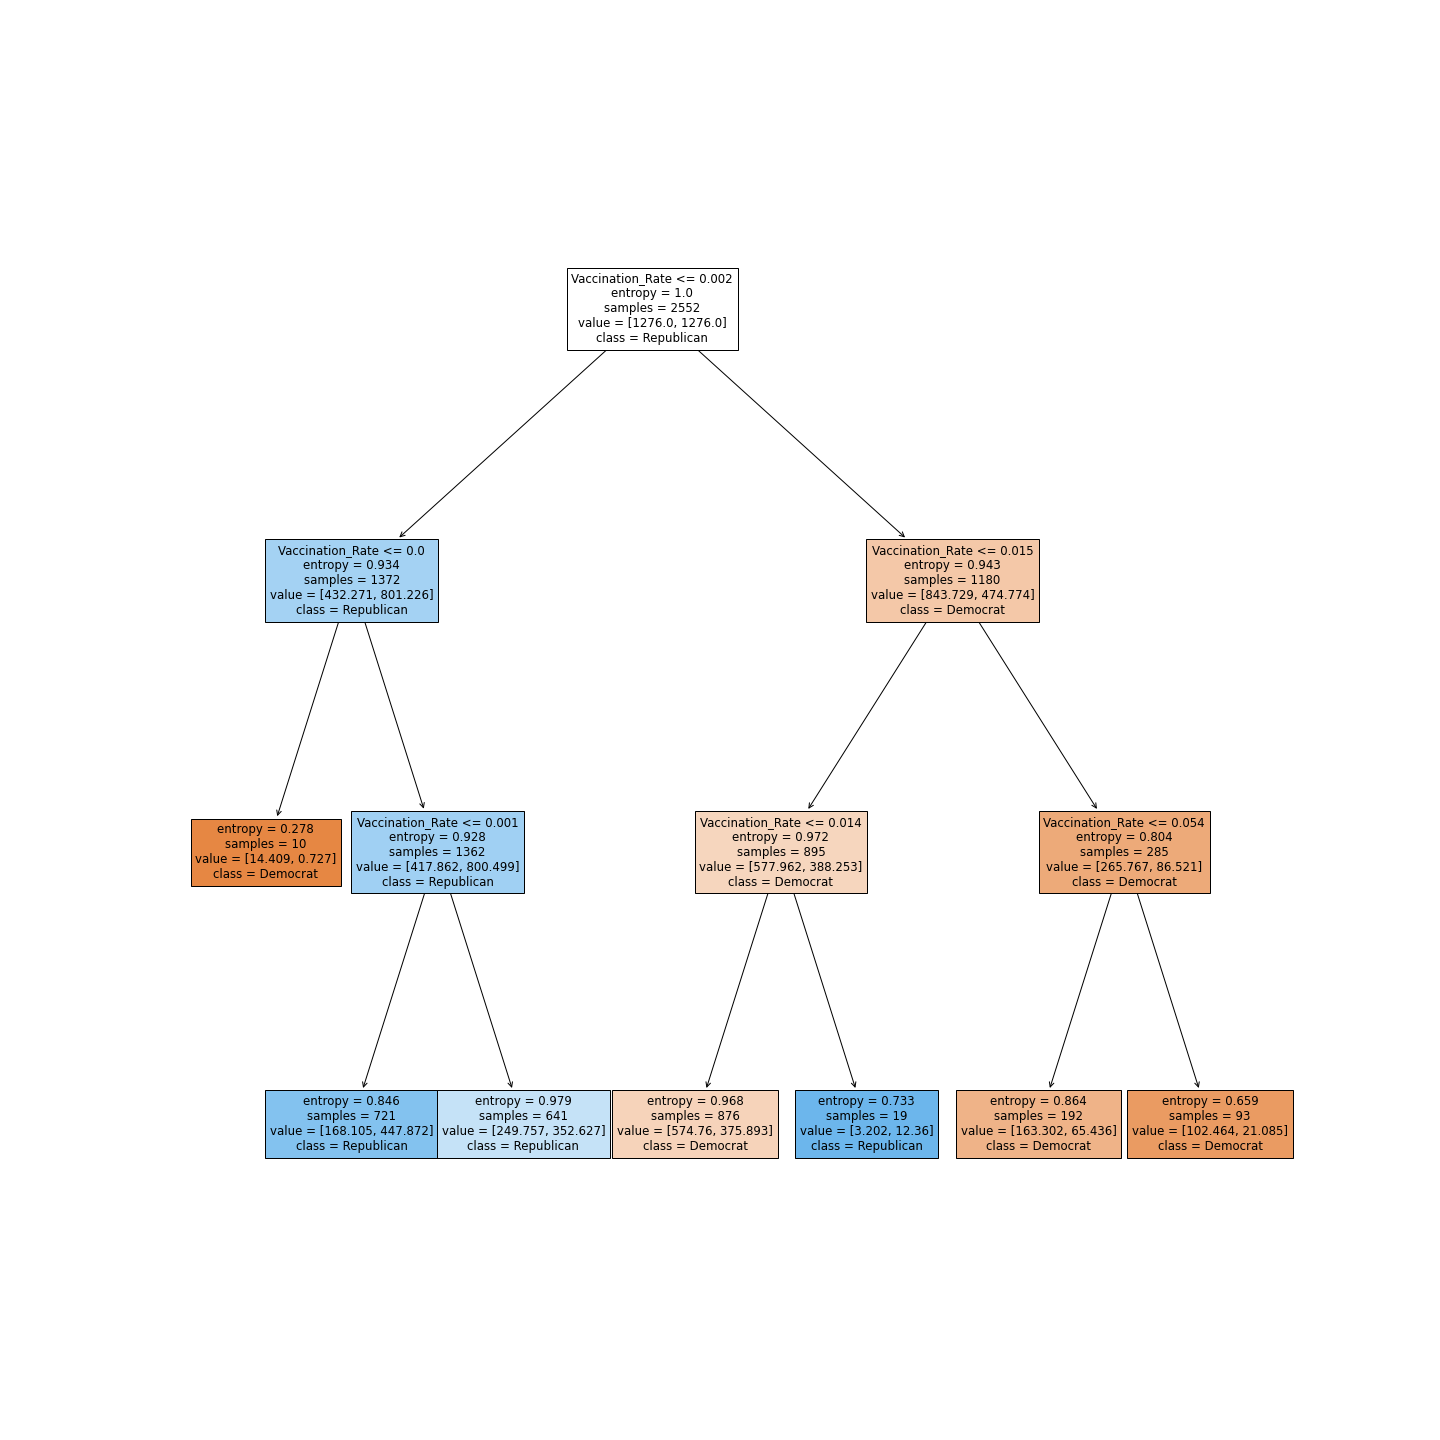

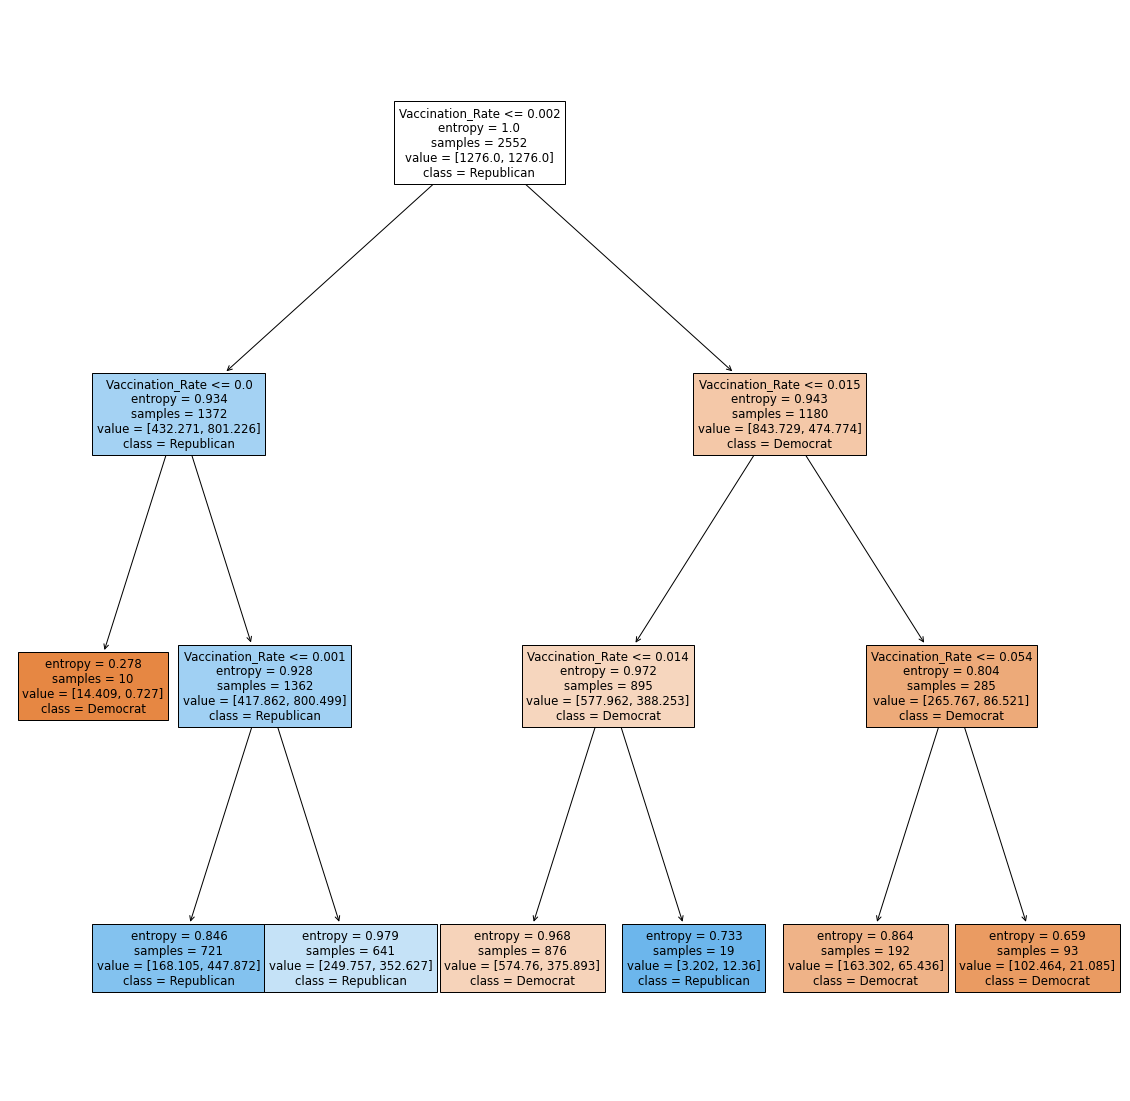

In [ ]:
from sklearn import tree
#Getting the best parameters
fig,ax = plt.subplots(1,1,figsize = (20,20)) 
dt_best = grid_search.best_estimator_
tree.plot_tree(dt_best,feature_names=X.columns, class_names=["Democrat", "Republican"], filled=True, ax = ax)

plt.savefig(join(path_prefix, "Decision_Tree.png"))
plt.show()

In [ ]:
beforeTraining = np.round(accuracy_score(y_test, dt.predict(X_test)), 2)
afterTraining = np.round(accuracy_score(y_test, dt_best.predict(X_test)), 2)

print("Before tuning accuracy:", beforeTraining)
print("After tuning accuracy:", afterTraining)

Before tuning accuracy: 0.61
After tuning accuracy: 0.66


## Conclusion

Throughout the project, vaccination rate has been observed to be a significant parameter for estimating the political tendency of a certain area, as made apparent by our hypothesis testing and decision tree classifier. 

Our models performed better than expected, considering we were naturally limited with the sample size, as we could only test with the number of states and counties available in the US.

A similar limitation was faced with finding features for counties. as we only had extra features for states, we could not develop a very accurate model for classification.



##Future Work

We believe that better models can be developed by considering some extra features alongside vaccination rate. Additionally, a more in-depth hyperparameter tuning could be performed to increase the accuracy of the model.

One of the critical assumptions we have made during our decision tree classifier was that the county labels were directly matching with the state labels. If county-based election results data were to be used, higher accuracy can be achieved. 

Finally, the model can be expanded to work for other countries, provided that similar datasets are available for that country. Also, the grouping of political tendencies can be made more complex so as to include different ideologies.

##Work Division
* Arda Gündüz: Preparation of sample statistics for use in hypothesis testing / Decision Tree Classifier.
* Ege Bağırsakçı: Cleaning & Preprocessing Vaccine Dataset / Random Forest Classifier.
* Erdem Karataş: Cleaning & Preprocessing Election Dataset / Decision Tree Classifier.
* Eylül Öykü Şen: Exploratory Data Analysis for the Election Dataset / Decision Tree Classifier.
* Kaan Karabacakoğlu: Exploratory Data Analysis for the Vaccination Dataset / Decision Tree Classifier.
* Özgür Yılmaz Beker: Hypothesis Testing for means / Random Forest Classifier.    